## STANDARD ANLYSIS OF CORRELATIONS BETWEEN A PAIR OF ASSETS
The cell below imports the standard stuff and creates a button to bring up the search_symbol_gui. 
- With this you can search for asset data and create watchlists. 
- You can then download the historical price data for the assets in that watchlist. 
- Then choose any selected pair of the assets in the watchlist and perform correlation analysis on the using my PairStats class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.format'] = 'svg'
plt.rcParams['animation.frame_format'] = 'svg'
plt.rcParams["figure.figsize"] = (10, 5.5)

# This gets the path where the MacroBackend is stored, so it can be imported.
# This is done with the in develpment version of the repo as an alternative to having the repo available  on pip as a finished package.

import os
wd = %pwd   #The current working directory is the one where this notebook file is stored
parent = os.path.dirname(wd); grampa = os.path.dirname(parent); ancestor = os.path.dirname(grampa)
fdel = os.path.sep   #The file path delimiter is OS dependent
import sys
print(wd, "\n", parent, grampa, ancestor)
sys.path.append(grampa)  #This adds the grandparent directory which contains the macrobackend to the system path
sys.path.append(ancestor)

#Use inline magic command to display plots in the notebook
%matplotlib inline 
bmsylePath = grampa + fdel + "MacroBackend" + fdel + "bm_inline.mplstyle"
plt.style.use(bmsylePath)  #This applies the bm_inline style to all matplotlib plots

import MacroBackend #This package is the main bunch of modules that comprise Bootleg_Macro.

import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = MacroBackend.Utilities.api_keys()

######Code to run the symbol search GUI below
%gui qt
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = MacroBackend.search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols, load and create watchlists")
button2 = widgets.Button(description="Load watchlist")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
# Step 5: Use HBox to position buttons next to each other
button.layout.width = '350px'
display(button)

######Code to run the symbol search GUI below

def load_watchlist(b) -> MacroBackend.search_symbol_gui.Watchlist:
    global watchlist  # Declare the use of the global variable
    print("Choose your cunt you fuckstick.")
    watch = MacroBackend.search_symbol_gui.Watchlist()
    watch.load_watchlist()
    if watch["watchlist"].empty:
        print("No watchlist loaded.")
    else:
        print("Successfully loaded watchlist.")
        watchlist = watch

button2 = widgets.Button(description="Load watchlist")
button2.on_click(load_watchlist)
display(button2)

/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Research_notebooks 
 /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data /Users/jamesbishop/Documents/Python/Bootleg_Macro /Users/jamesbishop/Documents/Python


/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/node_modules
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend /Users/jamesbishop/Documents/Python/Bootleg_Macro
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
[Errno 2] No such file or directory: '/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/system_settings.json' No settings file found. Using measured values. No problemo.
System information:  darwin , directory delimiter:  / , working directory:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Glassnode
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Boo

Button(description='Search for symbols, load and create watchlists', layout=Layout(width='350px'), style=Butto…

Button(description='Load watchlist', style=ButtonStyle())

Choose your cunt you fuckstick.
Loading watchlist from filepath:  
Checking for duplicates in watchlist... Original index/columns watchlist/metadata:  Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ', 'price_usd_close'],
      dtype='object') Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ', 'price_usd_close'],
      dtype='object')
Duplicate indexes found in watchlist:  []
Duplicate columns found in metadata:  []
Successfully loaded watchlist.


## Get the data series for the watchlist from the data sources listed in the watchlist dataframe

In [2]:
#watchlist.get_watchlist_data()  ## Use .get_watchlist_data() if this is a new watchlist or different machine and his method has not yet been called for this watchlist, thus no .h5s database file exists on disk for it.
watchlist.load_watchlist_data()   ## Use .load_watchlist_data() if you already have the data saved in a .h5s database file.
data = watchlist["watchlist_datasets"] ## Put all of the data into a single dict 'data' for quicker reference
data    # print the dict full of datafarmes/series of data.

Database filepath:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/LiquidityIndexes/LiquidityIndexes.h5s
Databse keys:  ['/Long27_GM2', '/Top50GM2', '/Top8_GM2', '/US_NLQ', '/US_NLQ_ECB_BOJ_PBoC_BoE_SNB', '/price_usd_close']
Loaded database from .h5s file, keys:  dict_keys(['Long27_GM2', 'Top50GM2', 'Top8_GM2', 'US_NLQ', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB', 'price_usd_close'])


{'Long27_GM2': Date
 2002-05-01    2.254915e+13
 2002-06-01    2.321070e+13
 2002-07-01    2.325982e+13
 2002-08-01    2.346538e+13
 2002-09-01    2.338513e+13
                   ...     
 2024-04-01    1.101871e+14
 2024-05-01    1.110915e+14
 2024-06-01    1.111634e+14
 2024-07-01    1.120861e+14
 2024-08-01    1.141158e+14
 Name: Global M2 (USD, ffill), Length: 268, dtype: float64,
 'Top50GM2': Date
 2007-01-01    3.741891e+13
 2007-02-01    3.797310e+13
 2007-03-01    3.856037e+13
 2007-04-01    3.917012e+13
 2007-05-01    3.925907e+13
                   ...     
 2024-04-01    1.147092e+14
 2024-05-01    1.157003e+14
 2024-06-01    1.157736e+14
 2024-07-01    1.167135e+14
 2024-08-01    1.188052e+14
 Name: Global M2 (USD, ffill), Length: 212, dtype: float64,
 'Top8_GM2': Date
 1996-01-01    1.562562e+13
 1996-02-01    1.583735e+13
 1996-03-01    1.585120e+13
 1996-04-01    1.592609e+13
 1996-05-01    1.588703e+13
                   ...     
 2024-04-01    9.747985e+13
 2024-05-01 

In [8]:
# from Bootleg_Macro.Liquidity import Global_M2

# FXPath = parent+fdel+"GM2_Data"+fdel+"FX_Data"
# M2Path = parent+fdel+"GM2_Data"+fdel+"M2_Data"
# top8path = grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+'UpdateM2Infos'+fdel+'M2Info_Top8.xlsx'
# print(M2Path, "\n", FXPath, "\n", top8path, "\n") 
# top8 = pd.read_excel(top8path, index_col=0)

# top8Sum = Global_M2.MakeDataCompFile(top8,M2Path,FXPath)
# top8Sum.to_excel(grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+'Datasums'+fdel+'Top8_DataComp.xlsx')

# top8com = Global_M2.CombineDatasSimp(top8,top8Sum,M2Path,FXPath) ##Step #3 multiply M2 & FX datas. 
# FinDataPath = parent+fdel+"GM2_Data"+fdel+"FinalData"+fdel
# top8fin = Global_M2.MakeMasterM2DF_2(top8Sum, FinDataPath) #Step #4: put all the data in a big master DF. 
# SaveDataTo = grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+"M2_USD_Tables"
# top8fin.to_excel(SaveDataTo+fdel+'Top8_M2_USD.xlsx')
# GM2_ffill_top8 = top8fin['Global M2 (USD, ffill)'].dropna()

# SeriesInfo = pd.Series({'units':'US Dollars','units_short': 'USD','title':'Global M2 top8','id':'GM2top8',"Source":"tv"},name='SeriesInfo')
# savePath = parent+fdel+'SavedData'+fdel
# GM2_ffill_top8.to_excel(savePath+'Top8_GM2.xlsx',sheet_name='Closing_Price')
# with pd.ExcelWriter(savePath+'Top8_GM2.xlsx', engine='openpyxl', mode='a') as writer:  
#     SeriesInfo.to_excel(writer, sheet_name='SeriesInfo')

'\nfrom Bootleg_Macro.Liquidity import Global_M2\n\nFXPath = parent+fdel+"GM2_Data"+fdel+"FX_Data"\nM2Path = parent+fdel+"GM2_Data"+fdel+"M2_Data"\ntop8path = grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+\'UpdateM2Infos\'+fdel+\'M2Info_Top8.xlsx\'\nprint(M2Path, "\n", FXPath, "\n", top8path, "\n") \ntop8 = pd.read_excel(top8path, index_col=0)\n\ntop8Sum = Global_M2.MakeDataCompFile(top8,M2Path,FXPath)\ntop8Sum.to_excel(grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+\'Datasums\'+fdel+\'Top8_DataComp.xlsx\')\n\ntop8com = Global_M2.CombineDatasSimp(top8,top8Sum,M2Path,FXPath) ##Step #3 multiply M2 & FX datas. \nFinDataPath = parent+fdel+"GM2_Data"+fdel+"FinalData"+fdel\ntop8fin = Global_M2.MakeMasterM2DF_2(top8Sum, FinDataPath) #Step #4: put all the data in a big master DF. \nSaveDataTo = grampa+fdel+"Liquidity"+fdel+"Global_M2"+fdel+"M2_USD_Tables"\ntop8fin.to_excel(SaveDataTo+fdel+\'Top8_M2_USD.xlsx\')\nGM2_ffill_top8 = top8fin[\'Global M2 (USD, ffill)\'].dropna()\n\nSeriesInfo = pd.Ser

In [3]:
bitty_muntly = watchlist["watchlist_datasets"]["price_usd_close"].resample('MS').last()
gm2 = watchlist["watchlist_datasets"]["Top50GM2"]
print(gm2, bitty_muntly )
rets = np.log(bitty_muntly/bitty_muntly.shift())
gm2_rets = np.log(gm2/gm2.shift())
rets = pd.concat([rets, gm2_rets], axis=1).dropna()
rets.rename({"price_usd_close":'BTC', 'Global M2 (USD, ffill)':'GM2'}, axis=1, inplace=True)  
rets

Date
2007-01-01    3.741891e+13
2007-02-01    3.797310e+13
2007-03-01    3.856037e+13
2007-04-01    3.917012e+13
2007-05-01    3.925907e+13
                  ...     
2024-04-01    1.147092e+14
2024-05-01    1.157003e+14
2024-06-01    1.157736e+14
2024-07-01    1.167135e+14
2024-08-01    1.188052e+14
Name: Global M2 (USD, ffill), Length: 212, dtype: float64 datetime
2010-07-01        0.067850
2010-08-01        0.060000
2010-09-01        0.061900
2010-10-01        0.192500
2010-11-01        0.208200
                  ...     
2024-06-01    62754.310361
2024-07-01    64687.837443
2024-08-01    58971.654336
2024-09-01    63245.674886
2024-10-01    67094.586105
Freq: MS, Name: price_usd_close, Length: 172, dtype: float64


BTC       GM2
2010-08-01 -0.122955  0.001169
2010-09-01  0.031176  0.034250
2010-10-01  1.134576  0.019313
2010-11-01  0.078403 -0.021873
2010-12-01  0.365283  0.030614
...              ...       ...
2024-04-01 -0.161150 -0.010684
2024-05-01  0.105439  0.008603
2024-06-01 -0.072727  0.000633
2024-07-01  0.030346  0.008085
2024-08-01 -0.092516  0.017763

[169 rows x 2 columns]

In [9]:
rets.corr(method='pearson')

BTC       GM2
BTC  1.000000  0.139071
GM2  0.139071  1.000000

In [12]:
pair5 = MacroBackend.Utilities.Pair_stats(bitty_muntly, gm2, windows = [12, 24, 48], ser1_title="Bitcoin", ser2_title="Global M2 (top50)", corr_method='pearson', watchlist_meta=watchlist["metadata"])

Series names: series1: Bitcoin series2: Global M2 (top50)
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  Bitcoin  frequency:  MS
Frequency determination function for series:  Global M2 (top50)  frequency:  MS
Monthly Monthly
Series frequencies (common to both):  Monthly periods in year:  12
Calculating returns for series:  Bitcoin Global M2 (top50)
Windows:  [12, 24, 48]
Whole time correlation, Bitcoin vs Global M2 (top50) : 0.8655881056149356
Whole time correlation between log returns, Bitcoin vs Global M2 (top50): 0.07060288923563965
Whole time correlation between log YoY returns, Bitcoin vs Global M2 (top50): 0.5820070617063599
Whole time correlation between percentage returns,Bitcoin vs Global M2 (top50): 0.03049318291362823
Whole time qd correlation between log returns,Bitcoin vs Global M2 (top50): 0.12761953577900056
Rolling stats Windows:  [12, 24, 48, 168]


Frequency of the pair:  Monthly


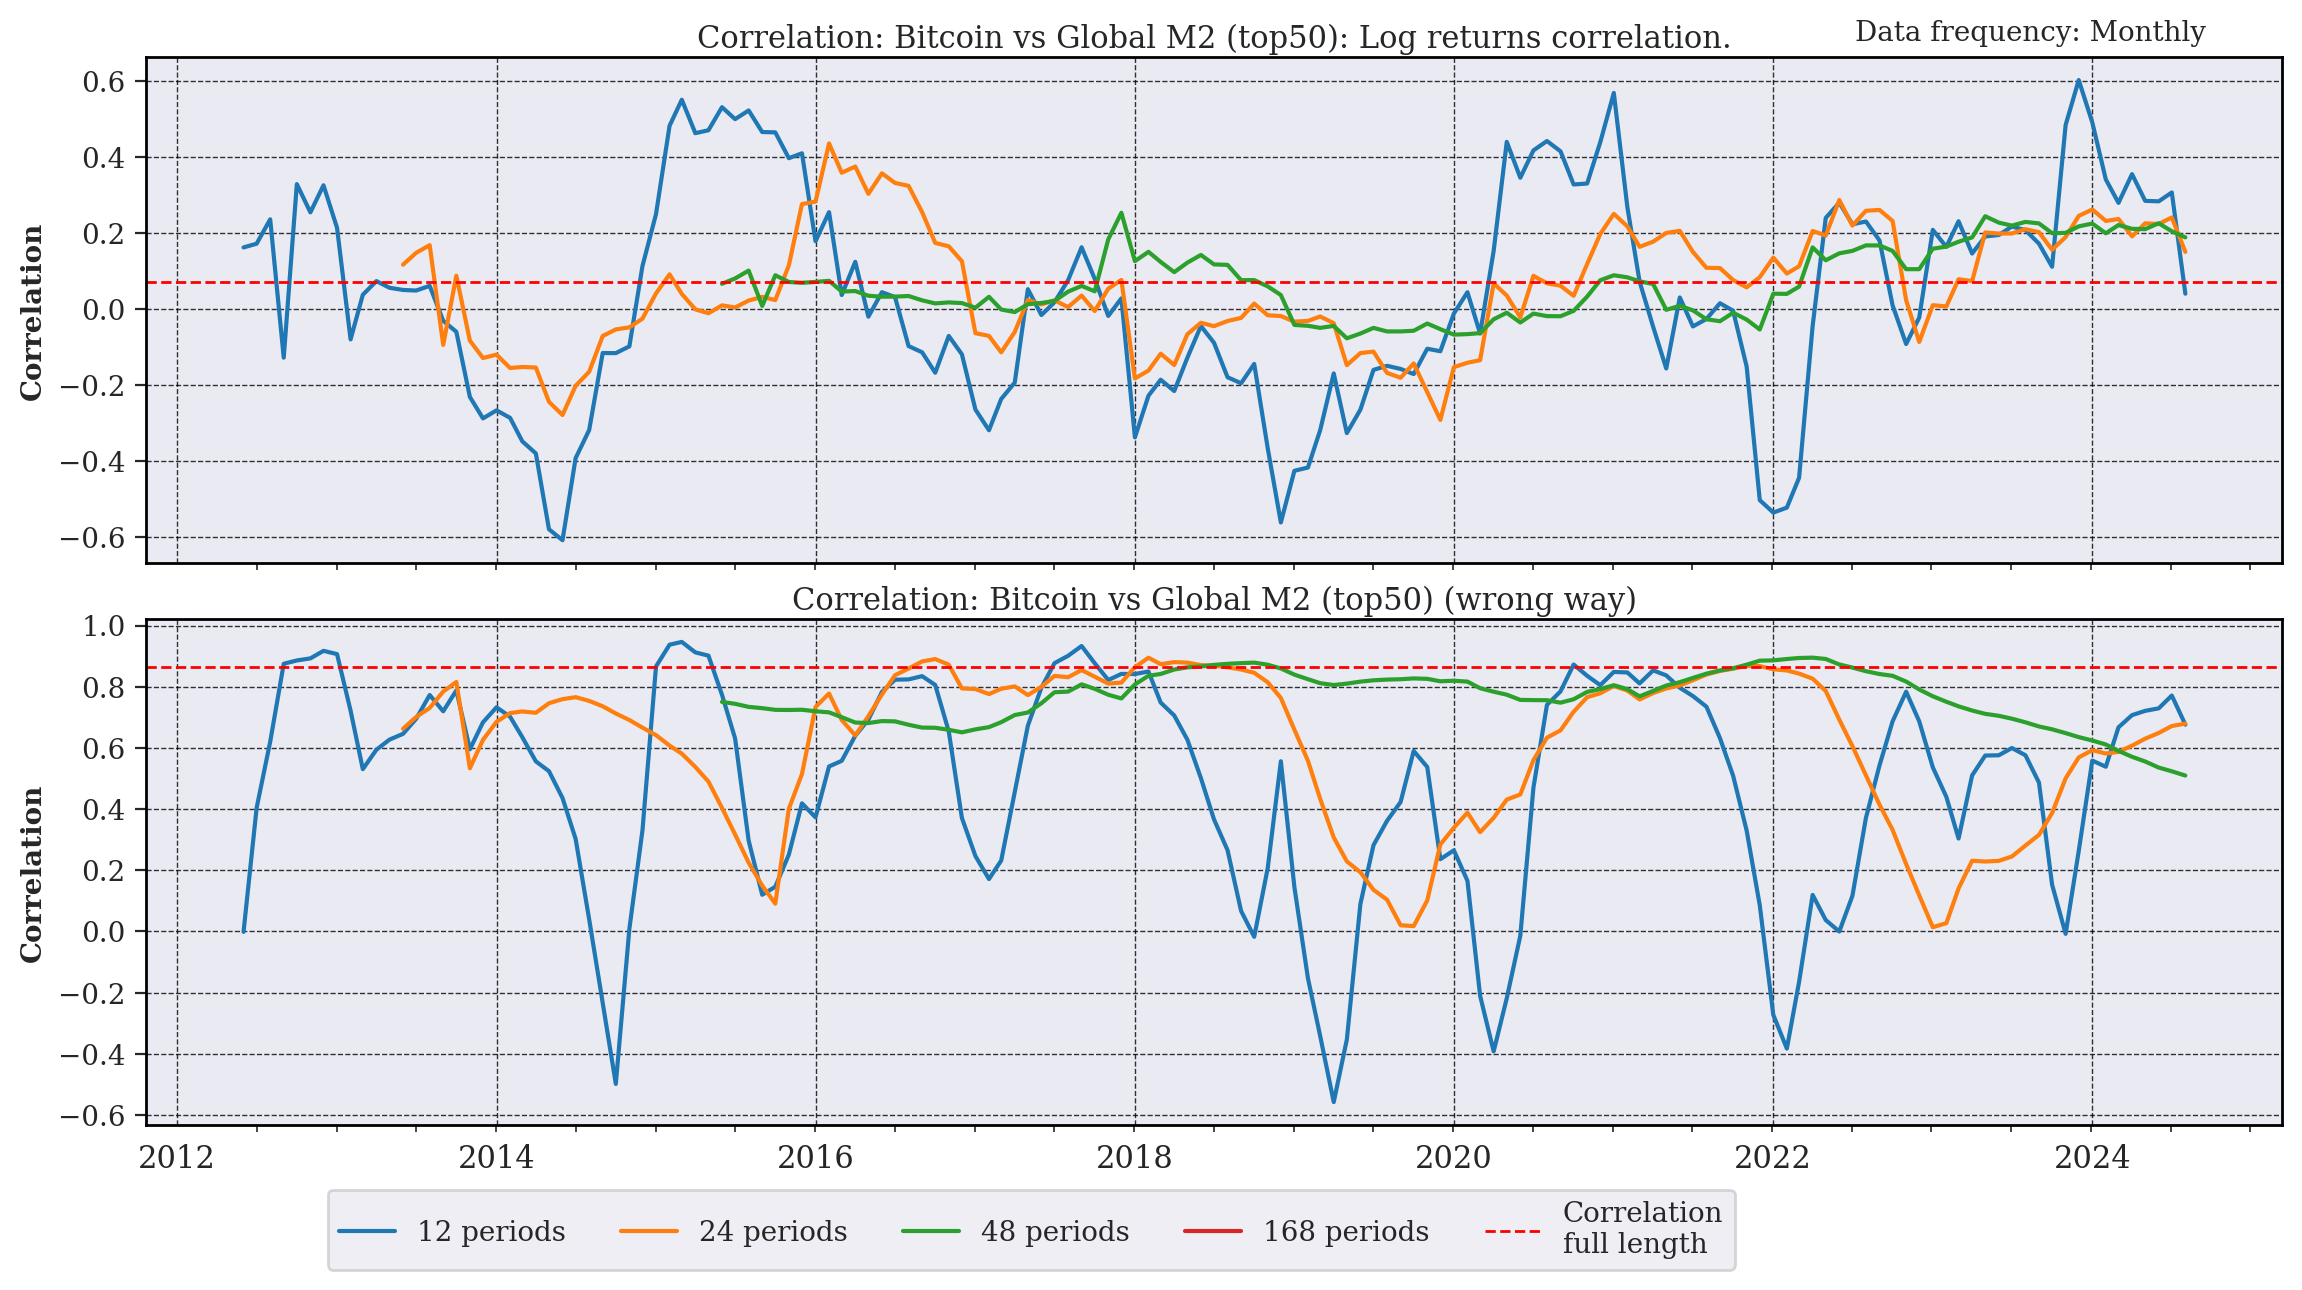

In [13]:
pair5.plot_corrs()

## Manually load a second or even more watchlist/s

In [10]:
liq_watch = MacroBackend.search_symbol_gui.Watchlist()
liq_watch.load_watchlist(liq_watch.watchlists_path + fdel + "LiquidityIndexes"+ fdel +"LiquidityIndexes.xlsx")

Loading watchlist from filepath:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/LiquidityIndexes/LiquidityIndexes.xlsx
Checking for duplicates in watchlist... Original index/columns watchlist/metadata:  Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ'],
      dtype='object') Index(['Top50GM2', 'Long27_GM2', 'Top8_GM2', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB',
       'US_NLQ'],
      dtype='object')
Duplicate indexes found in watchlist:  []
Duplicate columns found in metadata:  []


# View Watchlist/s

In [11]:
liq_watch["watchlist"]

id  \
Top50GM2                                        Top50GM2   
Long27_GM2                                    Long27_GM2   
Top8_GM2                                        Top8_GM2   
US_NLQ_ECB_BOJ_PBoC_BoE_SNB  US_NLQ_ECB_BOJ_PBoC_BoE_SNB   
US_NLQ                                            US_NLQ   

                                              title     source  
Top50GM2                     Global M2 (USD, ffill)  SavedData  
Long27_GM2                   Global M2 (USD, ffill)  SavedData  
Top8_GM2                     Global M2 (USD, ffill)  SavedData  
US_NLQ_ECB_BOJ_PBoC_BoE_SNB           Net liq. agg.  SavedData  
US_NLQ                        Fed net liq 3 (Bil $)  SavedData

In [12]:
liq_watch["metadata"]

Top50GM2  \
units                                               US Dollars   
units_short                                                USD   
title                                   Global M2 (USD, ffill)   
id                                                    Top50GM2   
Source                                                      tv   
source                                               SavedData   
notes        Global M2 (USD, ffill), aggregate index by the...   
frequency                                                  NaN   
LegendName                                                 NaN   
name                                                       NaN   

                                                    Long27_GM2  \
units                                               US Dollars   
units_short                                                USD   
title                                   Global M2 (USD, ffill)   
id                                                  Long27_GM2   
Source                                                      tv   
source                                               SavedData   
notes        Global M2 (USD, ffill), aggregate index by the...   
frequency                                                  NaN   
LegendName                                                 NaN   
name                                                       NaN   

                                                      Top8_GM2  \
units                                               US Dollars   
units_short                                                USD   
title                                   Global M2 (USD, ffill)   
id                                                    Top8_GM2   
Source                                                      tv   
source                                               SavedData   
notes        Global M2 (USD, ffill), aggregate index by the...   
frequency                                                  NaN   
LegendName                                                 NaN   
name                                                       NaN   

                                   US_NLQ_ECB_BOJ_PBoC_BoE_SNB  \
units                                                      NaN   
units_short                                      bil. of USD-$   
title                                            Net liq. agg.   
id                                 US_NLQ_ECB_BOJ_PBoC_BoE_SNB   
Source                                               SavedData   
source                                               SavedData   
notes        Net liq. agg., aggregate index by the Macro Bo...   
frequency                                                Daily   
LegendName   USD Net liquidity (NLQ) = (FED (total) - RevRe...   
name                               US_NLQ_ECB_BOJ_PBoC_BoE_SNB   

                                                        US_NLQ  
units                                                      NaN  
units_short                                      bil. of USD-$  
title                                    Fed net liq 3 (Bil $)  
id                                                      US_NLQ  
Source                                               SavedData  
source                                               SavedData  
notes        Fed net liq 3 (Bil $), aggregate index by the ...  
frequency                                                Daily  
LegendName   USD Net liquidity (NLQ) = (FED (total) - RevRe...  
name                                                    US_NLQ

In [20]:
#liq_watch.load_watchlist_data()
liqs = liq_watch["watchlist_datasets"]
liq_watch.save_watchlist()
liqs.keys()

Saving watchlist data to Excel file... save name:  LiquidityIndexes  to path:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists watchlist name:  LiquidityIndexes save path:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/LiquidityIndexes/LiquidityIndexes.xlsx save directory:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/LiquidityIndexes
Saved watchlist datasets to .h5s database... save name:  LiquidityIndexes


dict_keys(['Long27_GM2', 'Top50GM2', 'Top8_GM2', 'US_NLQ', 'US_NLQ_ECB_BOJ_PBoC_BoE_SNB'])

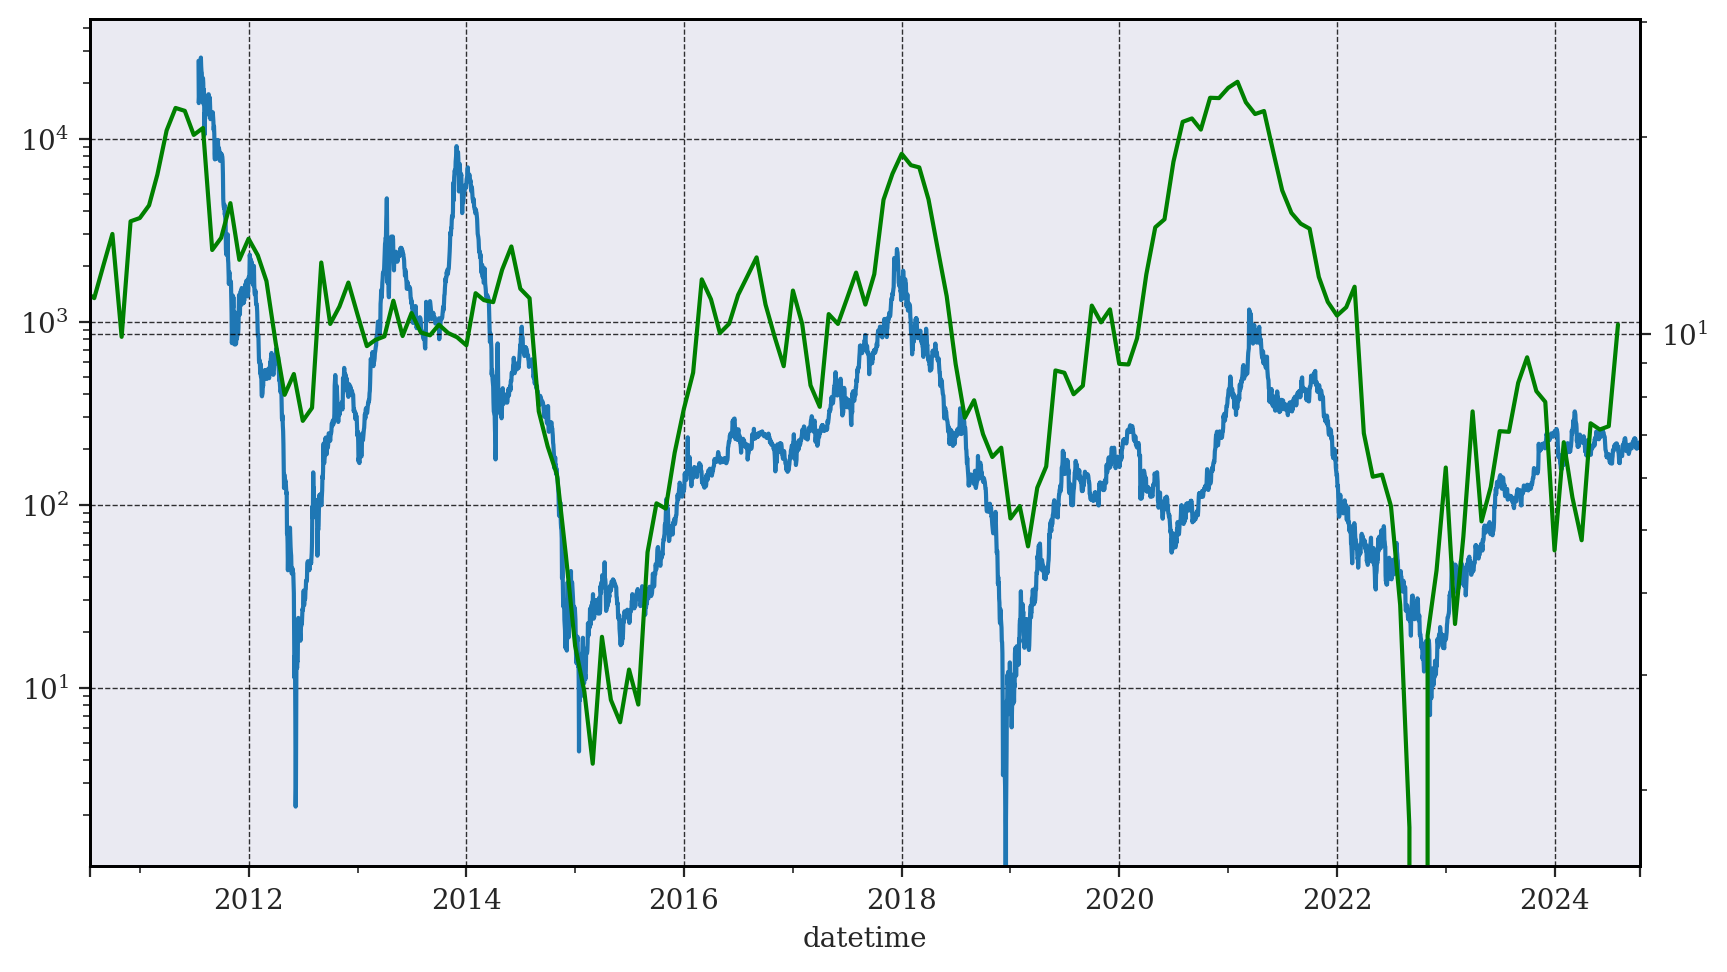

In [158]:
gm2_yoy = liqs["Top50GM2"].pct_change(12)*100 
gm2_yoy -= gm2_yoy.min() + 0.01
btc_yoy = pd.Series(watchlist["watchlist_datasets"]["price_usd_close"]).pct_change(365)*100

btc_yoy -= btc_yoy.min()+0.01
ax = pd.Series(btc_yoy).plot(logy = True)
axb = ax.twinx()
axb.set_yscale('log')
axb.plot(gm2_yoy, c = "green")

<BarContainer object of 170 artists>

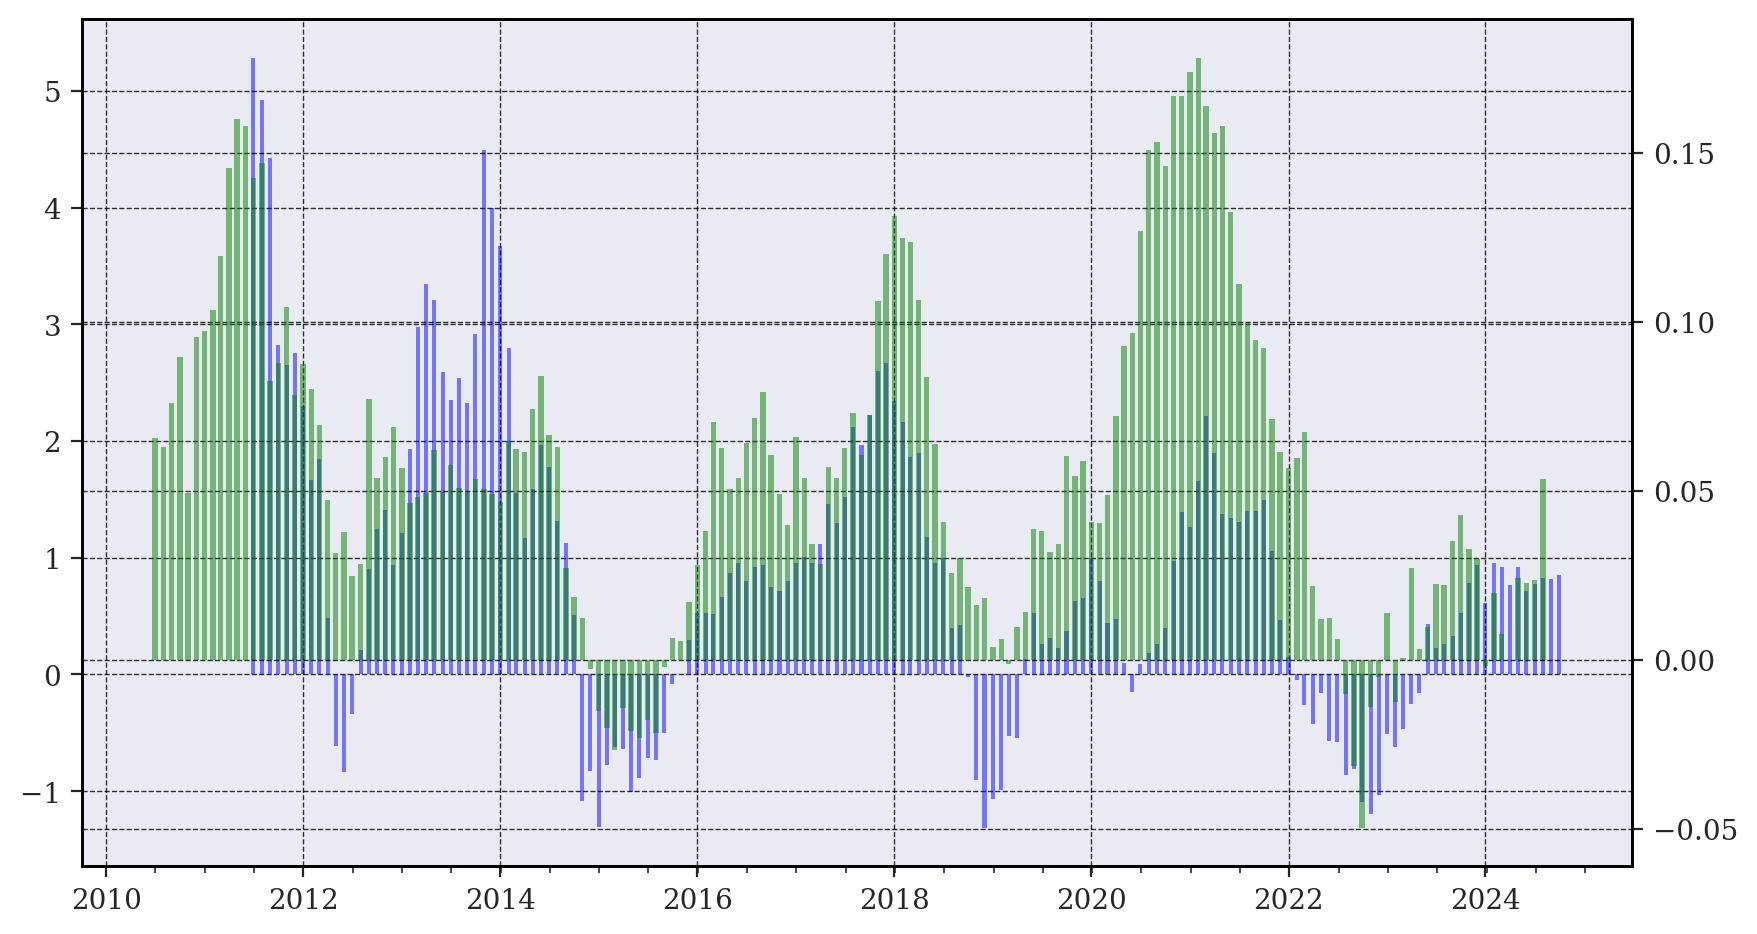

In [103]:
gm2_logyoy = np.log(liqs["Top50GM2"]/liqs["Top50GM2"].shift(12))
#gm2_yoy -= gm2_yoy.min() + 0.01
btc_yoy = pd.Series(watchlist["watchlist_datasets"]["price_usd_close"])
btc_logyoy = np.log(btc_yoy/btc_yoy.shift(365))
btc_logyoy = btc_logyoy.resample('MS').last()
gm2_logyoy = gm2_logyoy[btc_logyoy.index[0]::]

#btc_yoy -= btc_yoy.min()+0.01
afig, ax = plt.subplots()
ax.bar(btc_logyoy.index, btc_logyoy, width = 15, color = "blue", alpha = 0.5)
axb = ax.twinx()
#axb.set_yscale('log')
axb.bar(gm2_logyoy.index, gm2_logyoy, width = 20, color = "green", alpha = 0.5)

In [49]:
pair4 = MacroBackend.Utilities.Pair_stats(bitty_muntly, gm2, windows=[12, 24, 48], ser1_title="BTC", ser2_title="Global_M2 (top50)", corr_method='spearman')

Renaming series to match titles....
Series names: series1: BTC series2: Global_M2 (top50)
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  BTC  frequency:  MS
Frequency determination function for series:  Global_M2 (top50)  frequency:  MS
Monthly Monthly
Series frequencies (common to both):  Monthly periods in year:  12
Calculating returns for series:  BTC Global_M2 (top50)
Windows:  [12, 24, 48]
Whole time correlation, BTC vs Global_M2 (top50) : 0.9693713785009409
Whole time correlation between log returns, BTC vs Global_M2 (top50): 0.12832409687857016
Whole time correlation between log YoY returns, BTC vs Global_M2 (top50): 0.6916753250506952
Whole time correlation between percentage returns,BTC vs Global_M2 (top50): 0.12832409687857016
Whole time qd correlation between log returns,BTC vs Global_M2 (top50): 0.12761953577900056
Rolling stats Windows:  [12, 24, 48, 168]


/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


TypeError: Rolling.corr() got an unexpected keyword argument 'method'

In [89]:
pair2.data

BTC  Global_M2 (top50)   ret_BTC  ret_Global_M2 (top50)  \
2011-08-01  13689.264982          20.663442 -0.364168               0.024455   
2011-09-01   8301.718028          13.432828 -0.500149              -0.430664   
2011-10-01   1668.435301          14.020266 -1.604576               0.042802   
2011-11-01   1397.545103          15.847338 -0.177169               0.122498   
2011-12-01   1557.247595          12.974398  0.108203              -0.200023   
...                  ...                ...       ...                    ...   
2024-04-01    199.547143           4.821868 -0.159149              -0.150965   
2024-05-01    235.036393           7.285758  0.163690               0.412760   
2024-06-01    188.543457           7.126785 -0.220412              -0.022061   
2024-07-01    201.406074           7.211319  0.065995               0.011792   
2024-08-01    211.919816          10.325668  0.050885               0.358981   

            retPct_BTC  retPct_Global_M2 (top50)  \
2011-08-01   -0.305226                  0.024756   
2011-09-01   -0.393560                 -0.349923   
2011-10-01   -0.799025                  0.043731   
2011-11-01   -0.162362                  0.130317   
2011-12-01    0.114274                 -0.181288   
...                ...                       ...   
2024-04-01   -0.147131                 -0.140122   
2024-05-01    0.177849                  0.510983   
2024-06-01   -0.197812                 -0.021820   
2024-07-01    0.068221                  0.011861   
2024-08-01    0.052202                  0.431870   

            BTC_Global_M2 (top50)_Corr_12  BTC_Global_M2 (top50)_RetCorr_12  \
2011-08-01                            NaN                               NaN   
2011-09-01                            NaN                               NaN   
2011-10-01                            NaN                               NaN   
2011-11-01                            NaN                               NaN   
2011-12-01                            NaN                               NaN   
...                                   ...                               ...   
2024-04-01                       0.032195                          0.483747   
2024-05-01                      -0.135509                          0.515460   
2024-06-01                      -0.206975                          0.568068   
2024-07-01                      -0.220931                          0.711291   
2024-08-01                      -0.152706                          0.657917   

            BTC_Global_M2 (top50)_PctRetCorr_12  \
2011-08-01                                  NaN   
2011-09-01                                  NaN   
2011-10-01                                  NaN   
2011-11-01                                  NaN   
2011-12-01                                  NaN   
...                                         ...   
2024-04-01                             0.438914   
2024-05-01                             0.411794   
2024-06-01                             0.542431   
2024-07-01                             0.668504   
2024-08-01                             0.596859   

            BTC_Global_M2 (top50)_qdCorr_12  ...  \
2011-08-01                              NaN  ...   
2011-09-01                              NaN  ...   
2011-10-01                              NaN  ...   
2011-11-01                              NaN  ...   
2011-12-01                              NaN  ...   
...                                     ...  ...   
2024-04-01                         0.397371  ...   
2024-05-01                         0.519720  ...   
2024-06-01                         0.570795  ...   
2024-07-01                         0.691233  ...   
2024-08-01                         0.662410  ...   

            BTC_Global_M2 (top50)_PctRetCorr_48  \
2011-08-01                                  NaN   
2011-09-01                                  NaN   
2011-10-01                                  NaN   
2011-11-01                                  

Frequency of the pair:  Monthly


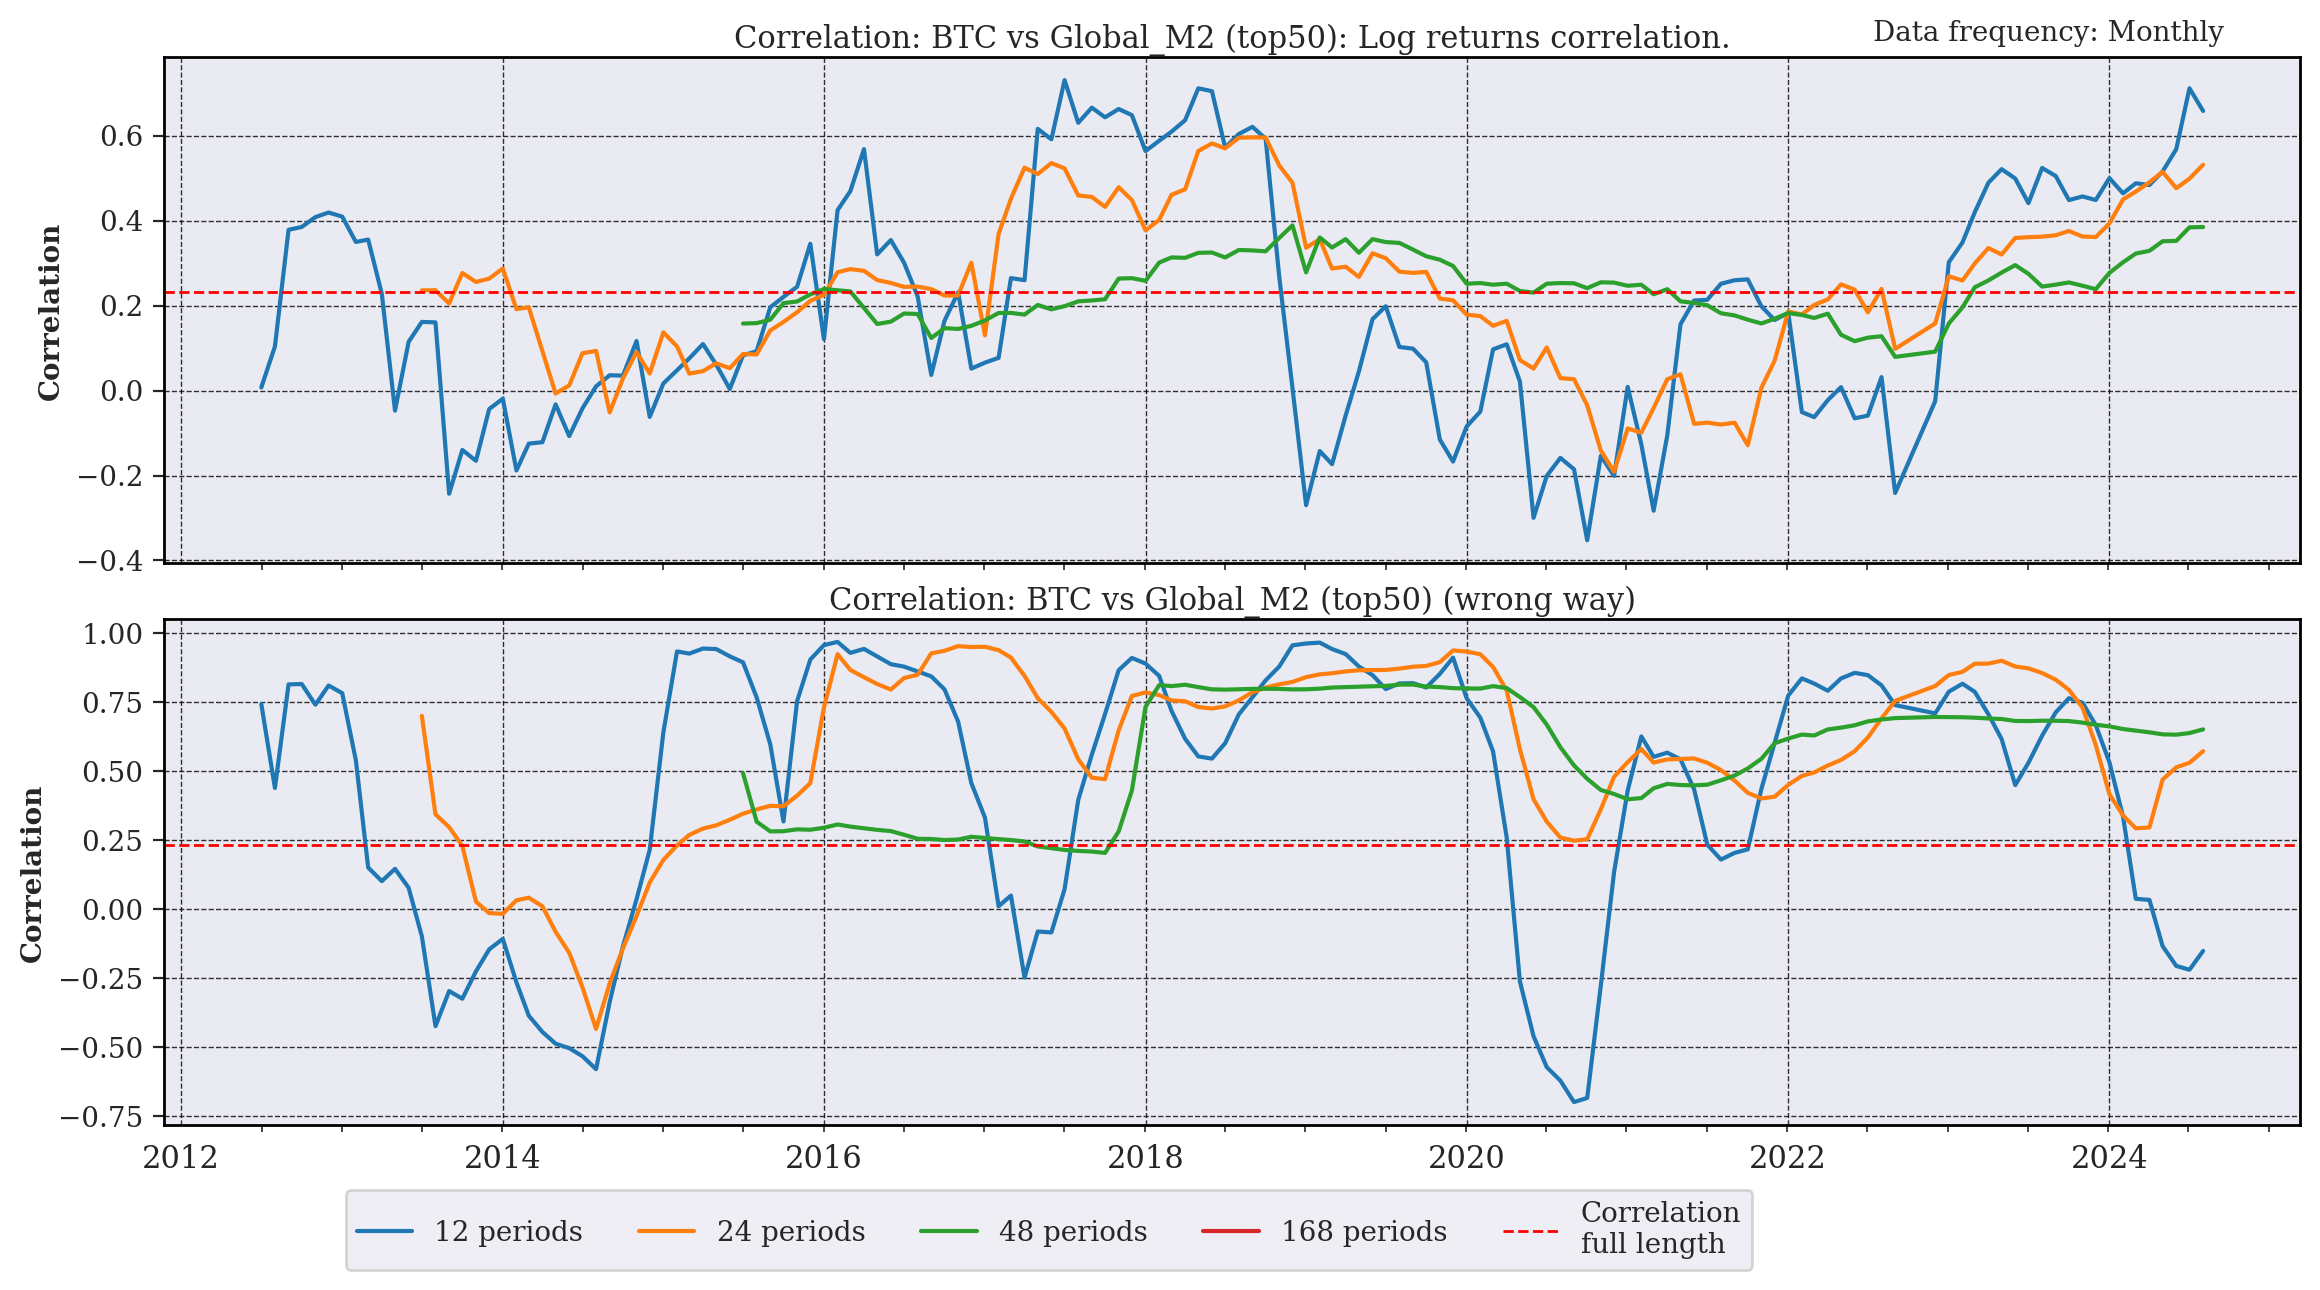

In [91]:
pair2.plot_corrs()

## Assign the assets that you want to use for correlation analysis

In [34]:
ass1id = "BTC"   # Assign the first asset of the pair that you wish to perform correlation analysis upon. "id" is the symbol of the asset.
ass2id = 'Top50GM2'     # Choose the the second asset of the pair that you wish to perform correlation analysis upon.
ass1 = data['price_usd_close']  # These are the data series for each asset assigned to short form reference.
ass2 = liqs[ass2id] / 10**12

##  CREATE THE PAIR_STATS OBJECT. THIS DOES MOST OF THE CORRELATION ANALYSIS WORK..
- Set the list of windows for your rolling PCC calculations. The windows are number of periods of asset at the frequency that the asset data are.
- Provide title names you would like to use (no spaces in names, best to use short names)
- You can downsample the data to a lower frequency e.g "W" (weekly) or "ME" (month-end). Do this is you have e.g crypto data (daily frequency) and equity data
of business day frequency. Downsample them both to weekly for best results. ALternatively ffill the equity data prior to insertion into pair_stats object.
- Provide the watchlist metadata too so that it can be used for labels etc.

In [151]:
pair1 = MacroBackend.Utilities.Pair_stats(ass1, ass2, windows=[12, 24, 48], ser1_title="BTC", ser2_title="Global_M2 (top50)")#, downsample_to="M")

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


Series names: series1: BTC series2: Global_M2 (top50)
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  BTC  frequency:  D
Frequency determination function for series:  Global_M2 (top50)  frequency:  MS
Daily Monthly
Frequency of series do not match, downsampling the higher freq series to match...
Resampling series 1 to match series 2...
Monthly Monthly
Series frequencies (common to both):  Monthly periods in year:  12
Calculating returns for series:  BTC Global_M2 (top50)
Windows:  [12, 24, 48]
Whole time correlation, BTC vs Global_M2 (top50) : 0.8655881056149359
Whole time correlation between log returns, BTC vs Global_M2 (top50): 0.07060288923563866
Whole time correlation between log YoY returns, BTC vs Global_M2 (top50): 0.5820070617063599
Whole time correlation between percentage returns,BTC vs Global_M2 (top50): 0.030493182913627723
Whole time qd correlation between log returns,BTC vs 

In [142]:
pair1.data

BTC  Global_M2 (top50)   ret_BTC  ret_Global_M2 (top50)  \
2011-07-01     13.379893          62.348771 -0.188390               0.013709   
2011-08-01      8.223536          62.691848 -0.486753               0.005487   
2011-09-01      5.149057          60.826619 -0.468187              -0.030204   
2011-10-01      3.243748          62.348210 -0.462084               0.024707   
2011-11-01      2.944310          62.019908 -0.096855              -0.005280   
...                  ...                ...       ...                    ...   
2024-04-01  60734.713016         114.709205 -0.161150              -0.010684   
2024-05-01  67488.324170         115.700346  0.105439               0.008603   
2024-06-01  62754.310361         115.773649 -0.072727               0.000633   
2024-07-01  64687.837443         116.713486  0.030346               0.008085   
2024-08-01  58971.654336         118.805239 -0.092516               0.017763   

            retYoY_BTC  retYoY_Global_M2 (top50)  retPct_BTC  \
2011-07-01    5.284209                  0.142693   -0.171708   
2011-08-01    4.920411                  0.147012   -0.385381   
2011-09-01    4.421049                  0.082558   -0.373863   
2011-10-01    2.824389                  0.087953   -0.370031   
2011-11-01    2.649131                  0.104547   -0.092312   
...                ...                       ...         ...   
2024-04-01    0.728046                 -0.000048   -0.148836   
2024-05-01    0.907688                  0.024294    0.111199   
2024-06-01    0.721803                  0.022741   -0.070146   
2024-07-01    0.794389                  0.023567    0.030811   
2024-08-01    0.821663                  0.053532   -0.088366   

            retPct_Global_M2 (top50)  BTC_Global_M2 (top50)_Corr_12  \
2011-07-01                  0.013804                            NaN   
2011-08-01                  0.005503                            NaN   
2011-09-01                 -0.029752                            NaN   
2011-10-01                  0.025015                            NaN   
2011-11-01                 -0.005266                            NaN   
...                              ...                            ...   
2024-04-01                 -0.010627                       0.707065   
2024-05-01                  0.008640                       0.721001   
2024-06-01                  0.000634                       0.729260   
2024-07-01                  0.008118                       0.771162   
2024-08-01                  0.017922                       0.675919   

            BTC_Global_M2 (top50)_RetCorr_12  ...  \
2011-07-01                               NaN  ...   
2011-08-01                               NaN  ...   
2011-09-01                               NaN  ...   
2011-10-01                               NaN  ...   
2011-11-01                               NaN  ...   
...                                      ...  ...   
2024-04-01                          0.355196  ...   
2024-05-01                          0.284909  ...   
2024-06-01                          0.283581  ...   
2024-07-01                          0.306903  ...   
2024-08-01                          0.040579  ...   

            BTC_Global_M2 (top50)_qdCorr_48  BTC_Global_M2 (top50)_beta_48  \
2011-07-01                              NaN                            NaN   
2011-08-01                              NaN                            NaN   
2011-09-01                              NaN                            NaN   
2011-10-01                              NaN                            NaN   
2011-11-01                              NaN                            NaN   
...                                     ...                            ...   
2024-04-01                         0.258157                       8.009326   
2024-05-01                         0.256593                       7.851790   
2024-06-01                         0.266890                       7.701496   
2024-07-01           

### Set your chosen colors for your two series and plot the series on a two-axis chart.

Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.
Left ticks:  ([0.06, 0.2839105301432391, 1.343419818770251, 6.356850549199934, 30.079613491078238, 142.33198354592912, 673.4924817477255, 3186.8601256747093, 15079.719129544274, 71354.85087466765], ['0.1', '0.3', '1.3', '6.4', '30.1', '142.3', '673.5', '3186.9', '15079.7', '71354.9'])
Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.


Text(0.35, 0.055, '$ Global\\ M2 = \\sum_{i=1}^{50} M2_i \\times CUR_{i}\\ (USD) $\n$CUR_{i}\\ (USD)$ = Native currency-USD FX Pair')

/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


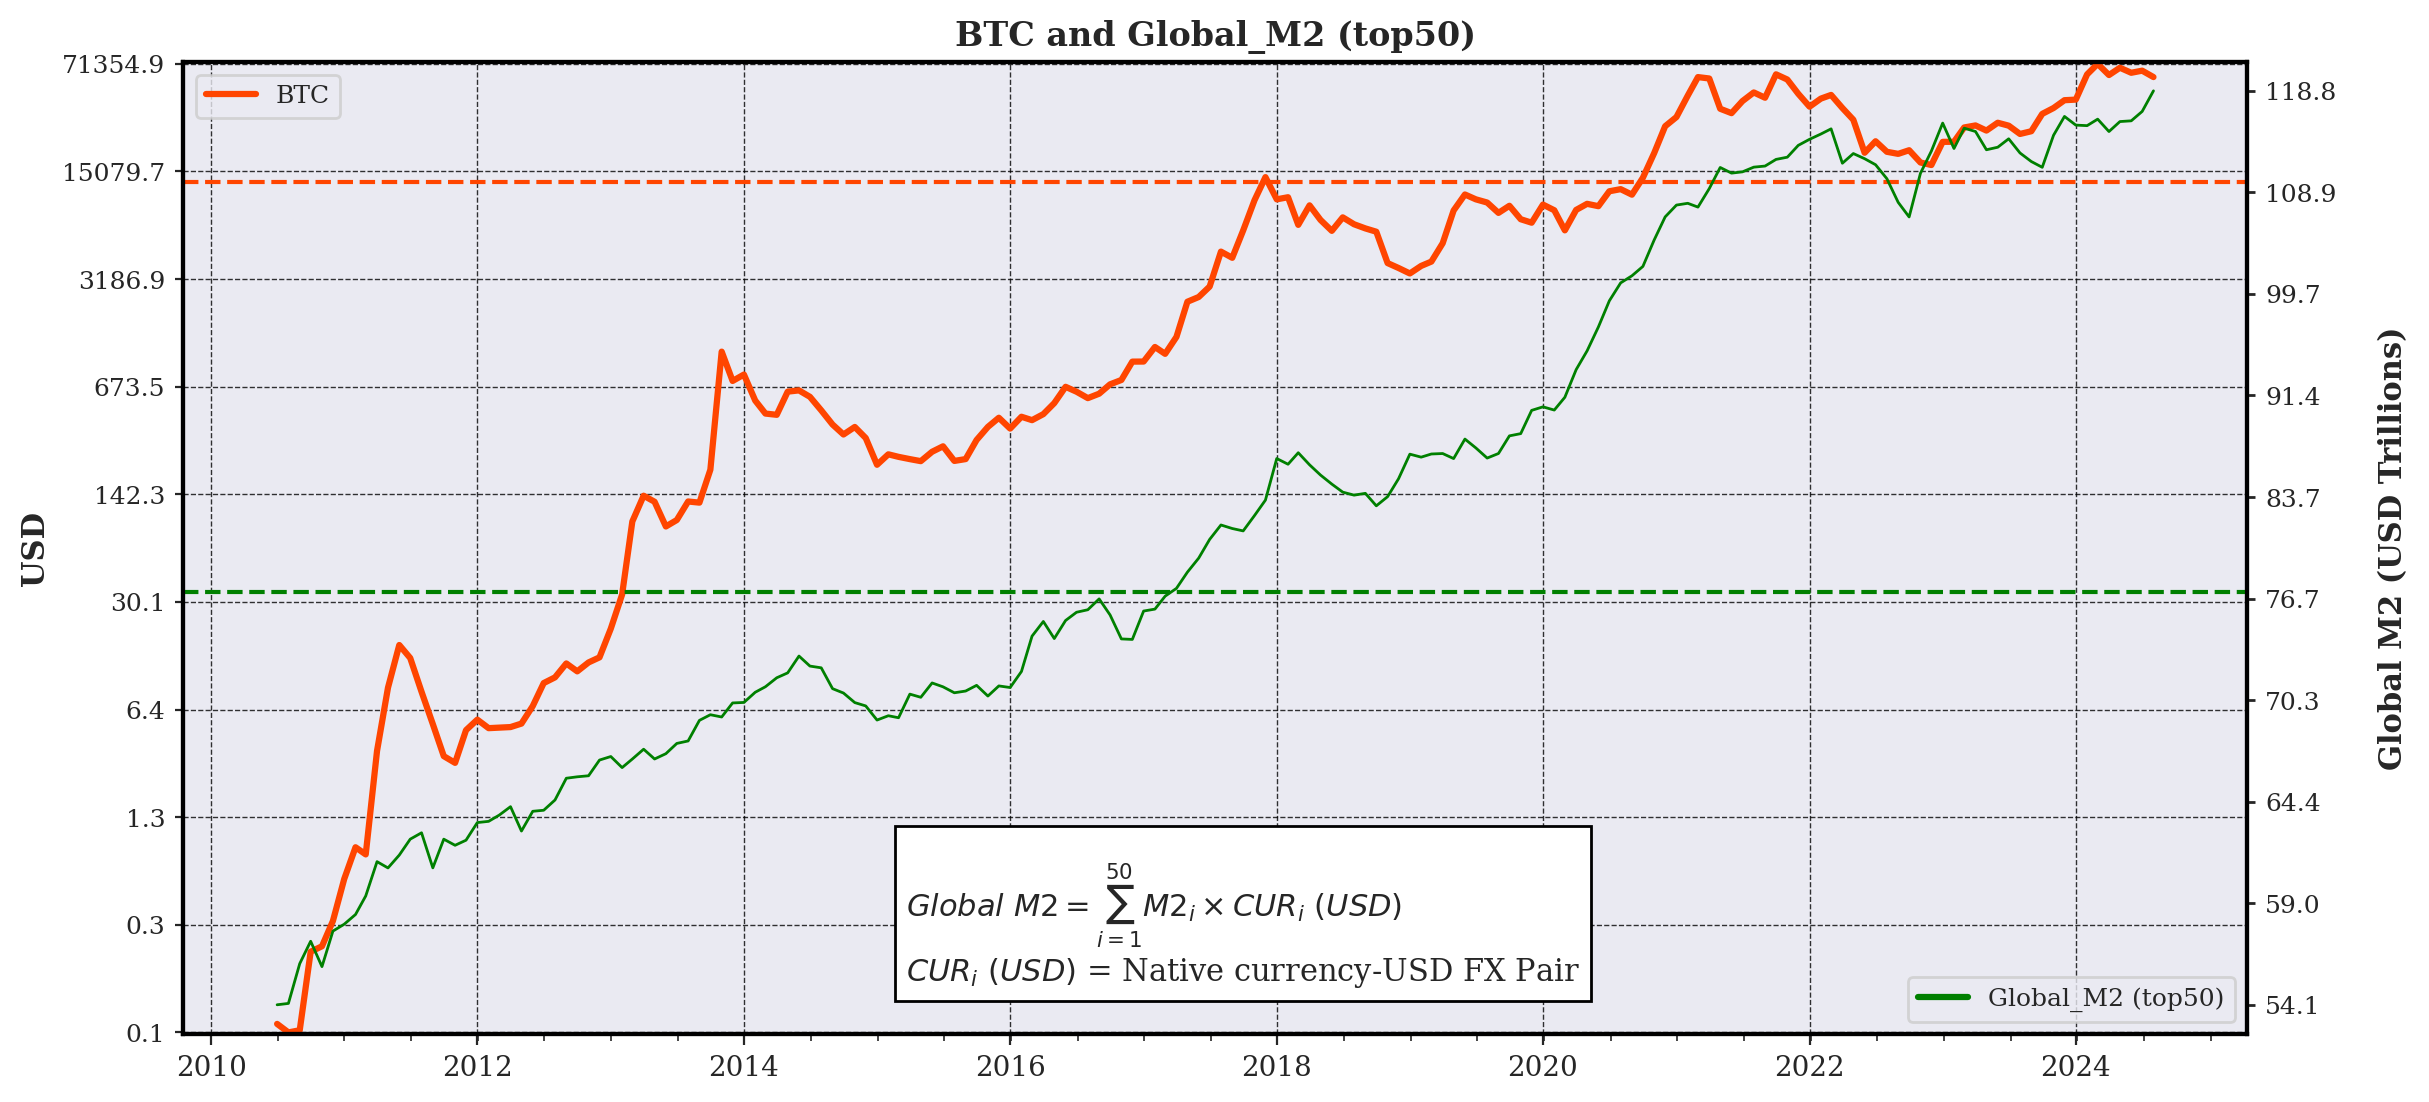

In [143]:
%matplotlib inline
c1 = "orangered"; c2 = "green"  # c1 and c2 are the colors to use for series 1 and 2.
fig, ax = pair1.plot_series(color1=c1, color2=c2)   # this is my plot_series method.
ax.axhline(ass1.mean(), lw = 1.5, ls = "--", c = c1)  # Add horizontal lien for the mean. Comment out to remove the mean line.
axb = fig.axes[1]; axb.grid(False)
axb.axhline(ass2.mean(), lw = 1.5, ls = "--", c = c2)
axb.get_lines()[0].set_linewidth(1)
axb.set_ylabel("Global M2 (USD Trillions)")
ax.minorticks_on()
ax.text(0.35, 0.055, r"$ Global\ M2 = \sum_{i=1}^{50} M2_i \times CUR_{i}\ (USD) $"+"\n"+r"$CUR_{i}\ (USD)$ = Native currency-USD FX Pair", transform = ax.transAxes, fontsize = 11,
        bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

### Optional deviation from the mean figure.
- Uses a plot template from my Charting module.
- SHows the deviation from the mean for each asset.

In [27]:
# pair1.data[pair1.ser1_title+"-meanDev"] = pair1.data[pair1.ser1_title] - pair1.data[pair1.ser1_title].mean()
# pair1.data[pair1.ser2_title+"-meanDev"] = pair1.data[pair1.ser2_title] - pair1.data[pair1.ser2_title].mean()
# MacroBackend.Charting.gen_subplots_bar(pair1.data[pair1.ser1_title+"-meanDev"], pair1.data[pair1.ser2_title+"-meanDev"], color1=c1, color2=c2, title = "Deviation from mean")

## Plot Log Returns

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


Plot width:  2170.0 bar width:  13.734177215189874


(<Figure size 2800x1200 with 2 Axes>,
 array([<Axes: title={'center': 'YoY Log Returns: BTC vs Global_M2 (top50)'}, ylabel='Log Returns'>,
        <Axes: ylabel='Log Returns'>], dtype=object))

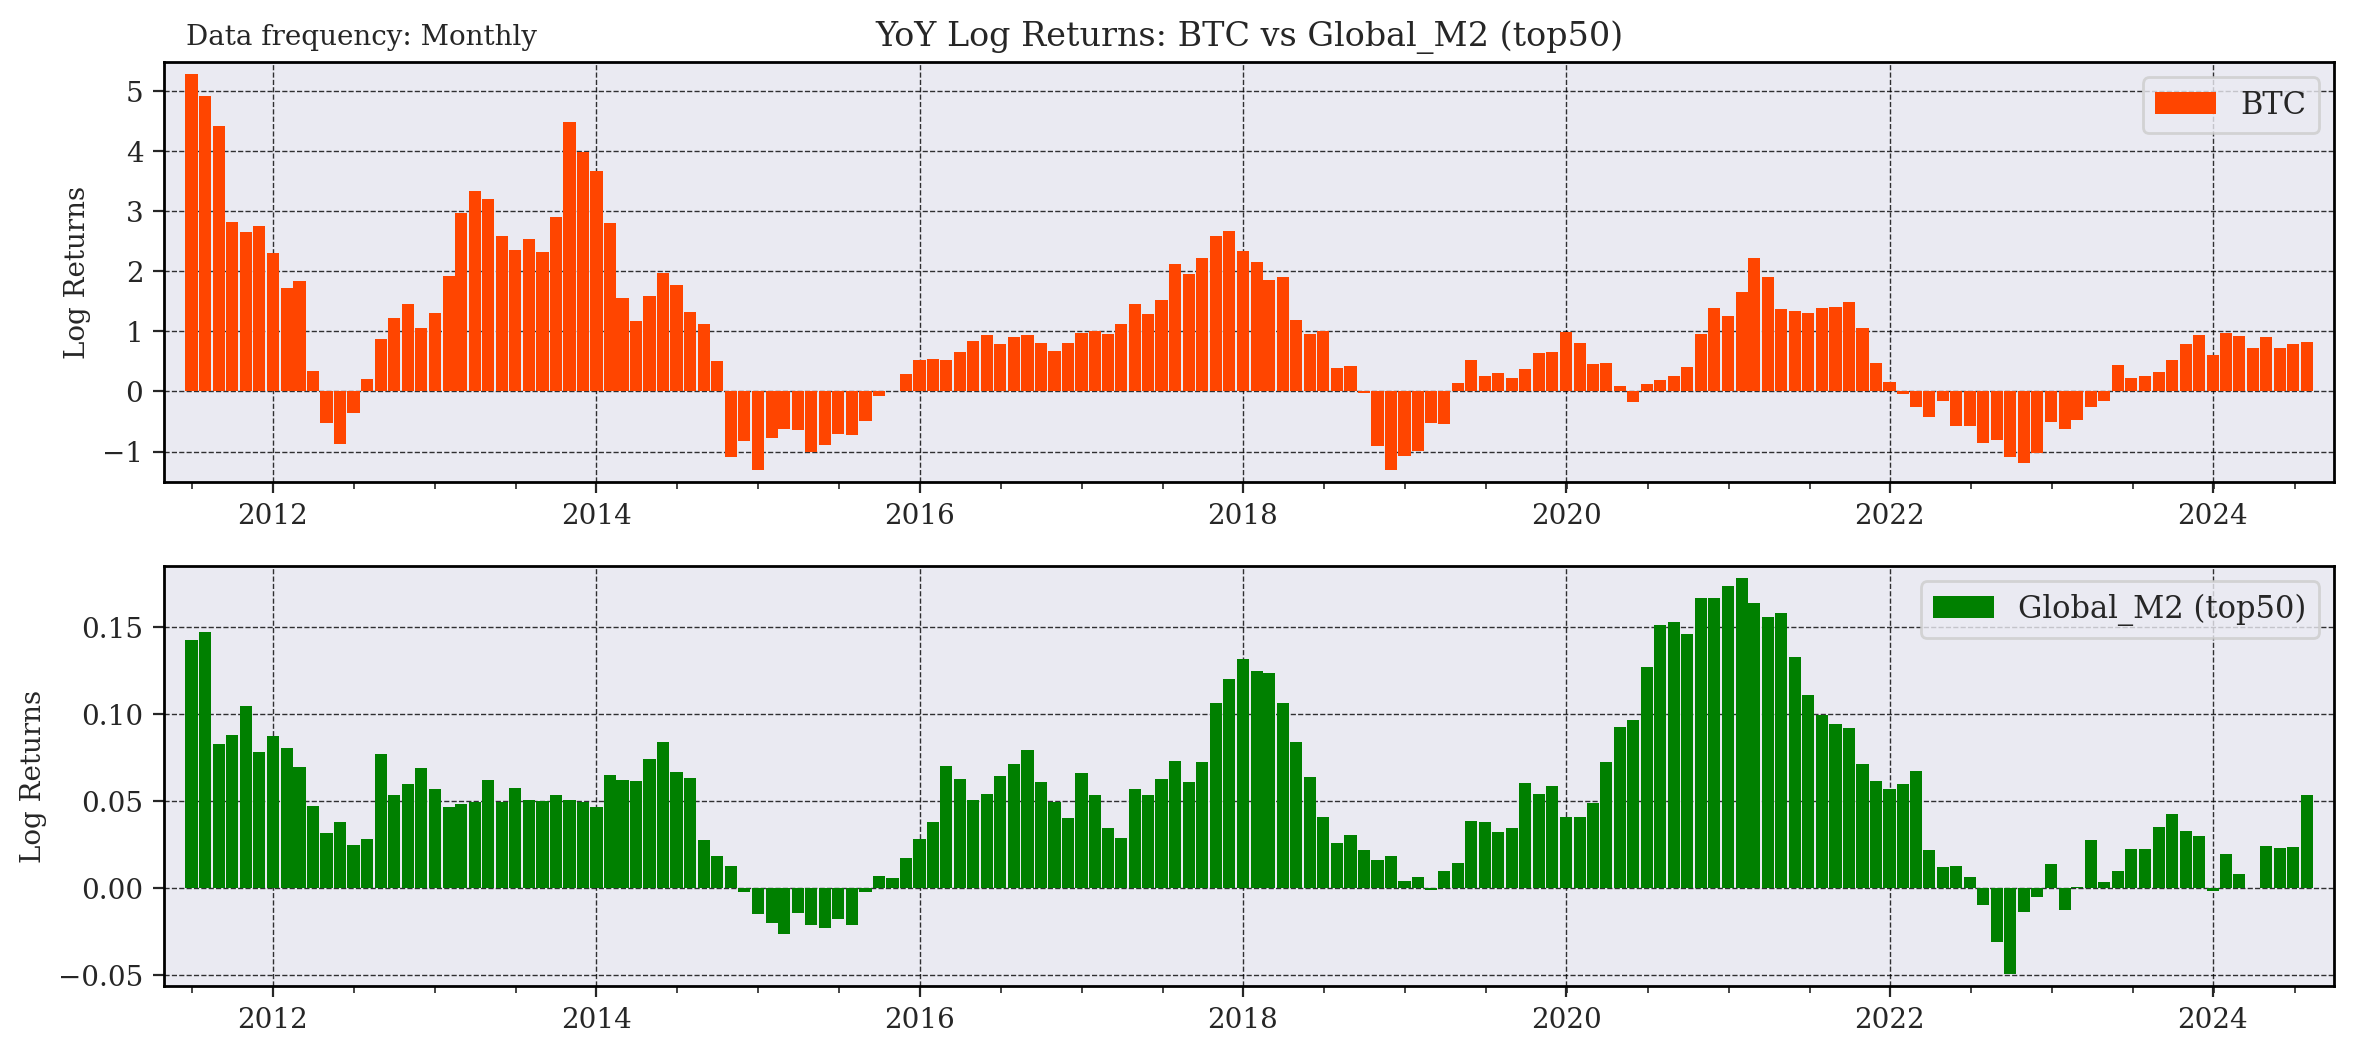

In [147]:
pair1.plot_log_returns_alt(color1=c1, color2=c2, YoY=True)  # You can downsample further, just for this figure, won't affect the self.data DataFrame.

### My modfied scatter matrix plot with the kde peak line

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:342: SyntaxWarning: invalid escape sequence '\{'
  if re.search(f"^\{p}", str(MathOpStr[x])) and type(MathOpStr[x]) == str:


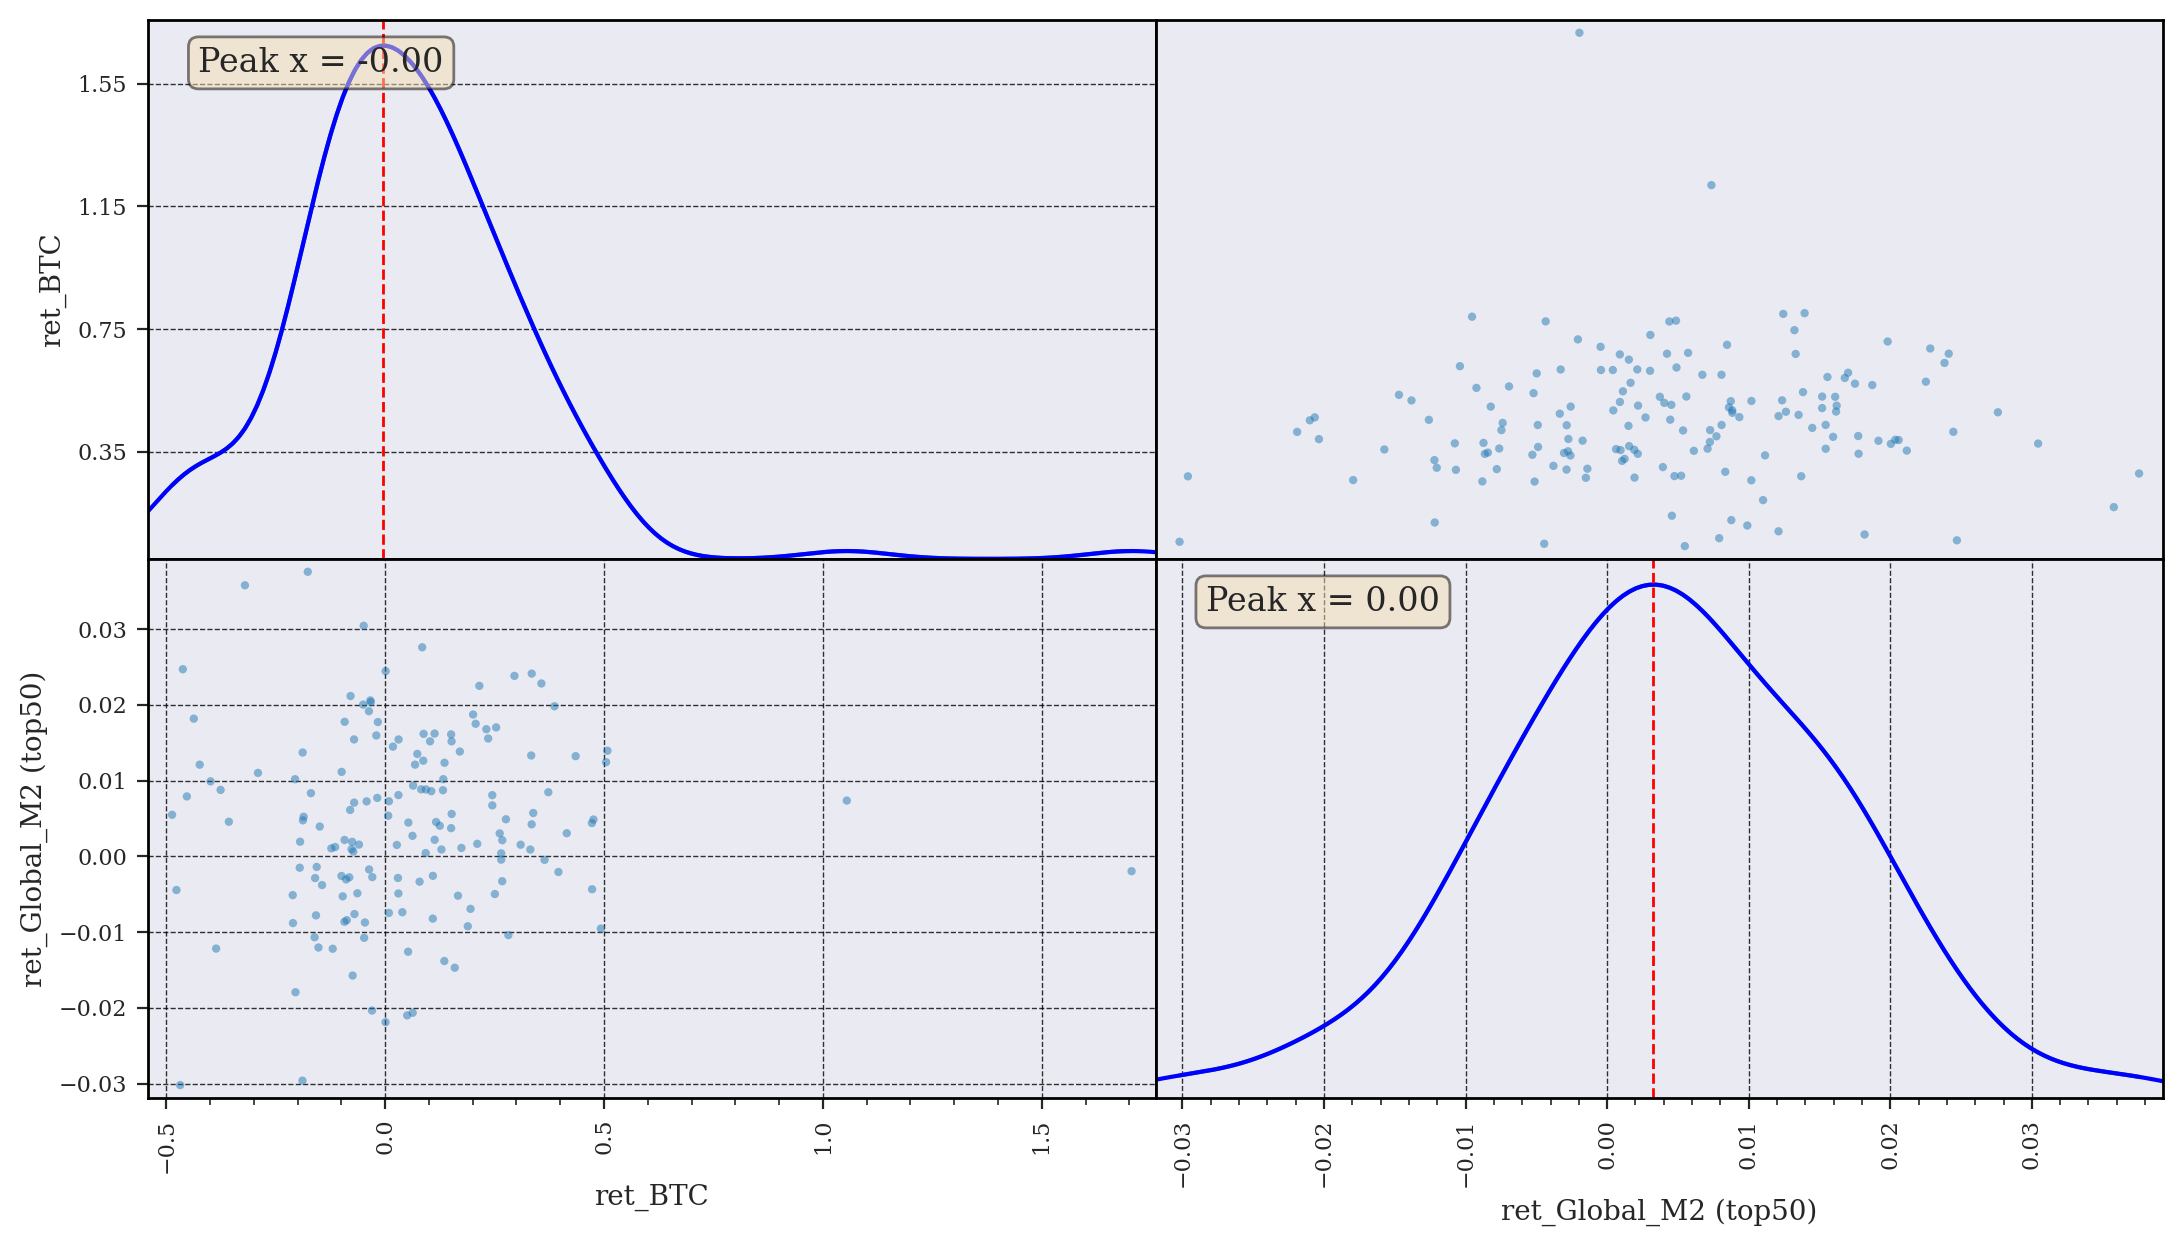

In [148]:
scatMat = pair1.bm_scatterMatrix()

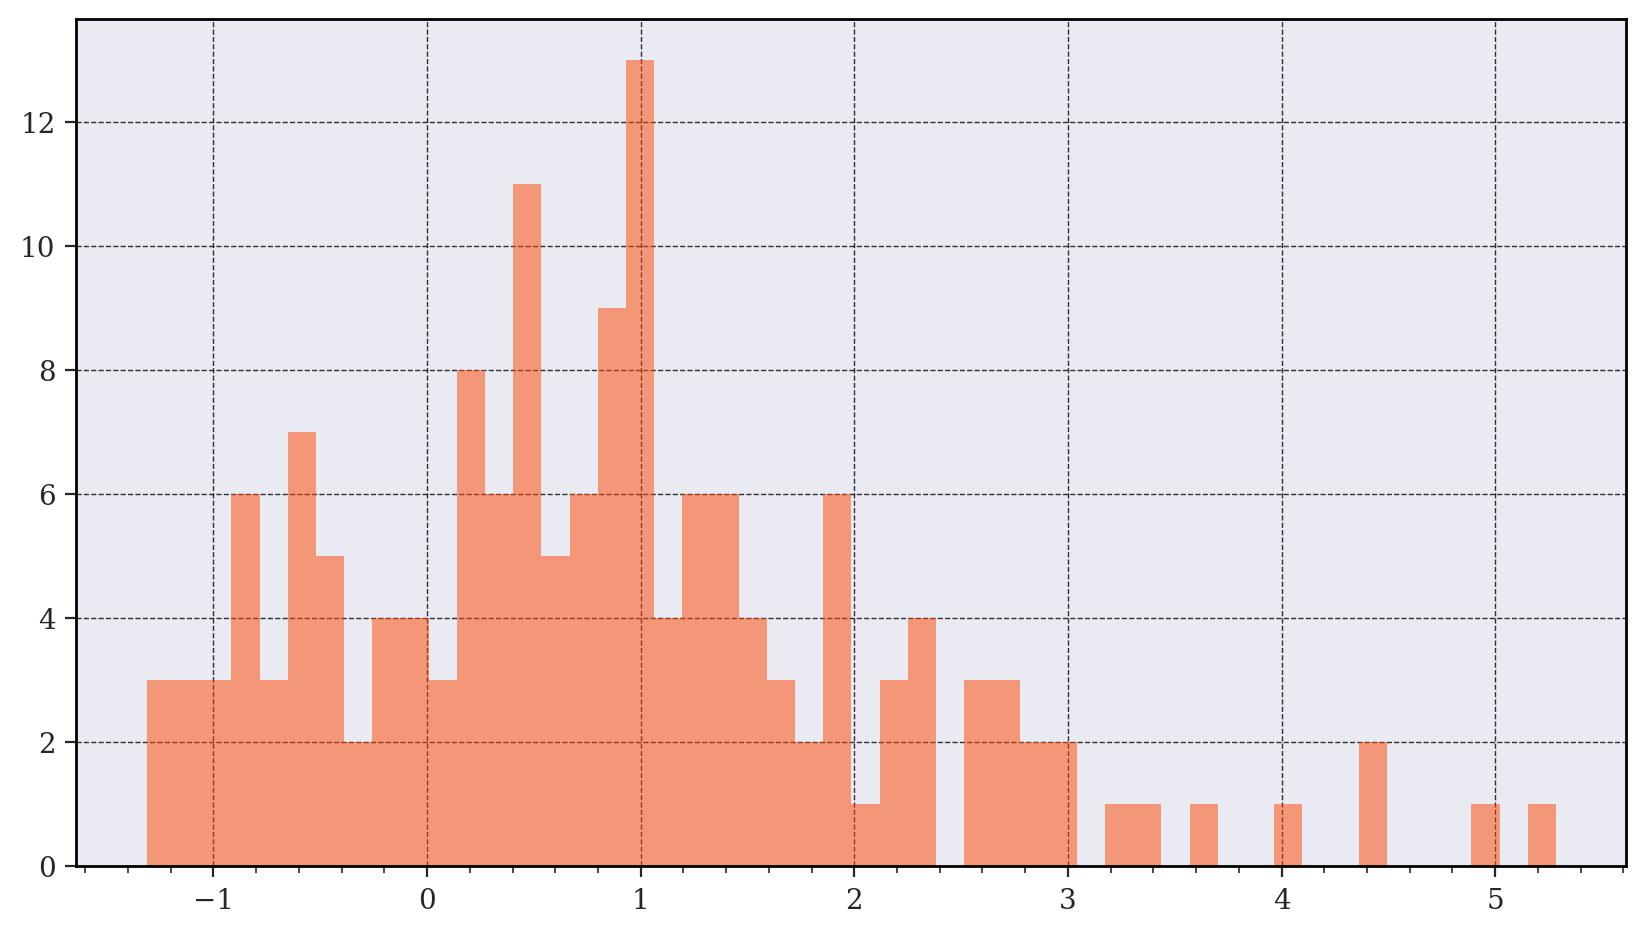

In [157]:
h1 = pair1.data["retYoY_BTC"].hist(bins=50, alpha=0.5, color=c1)

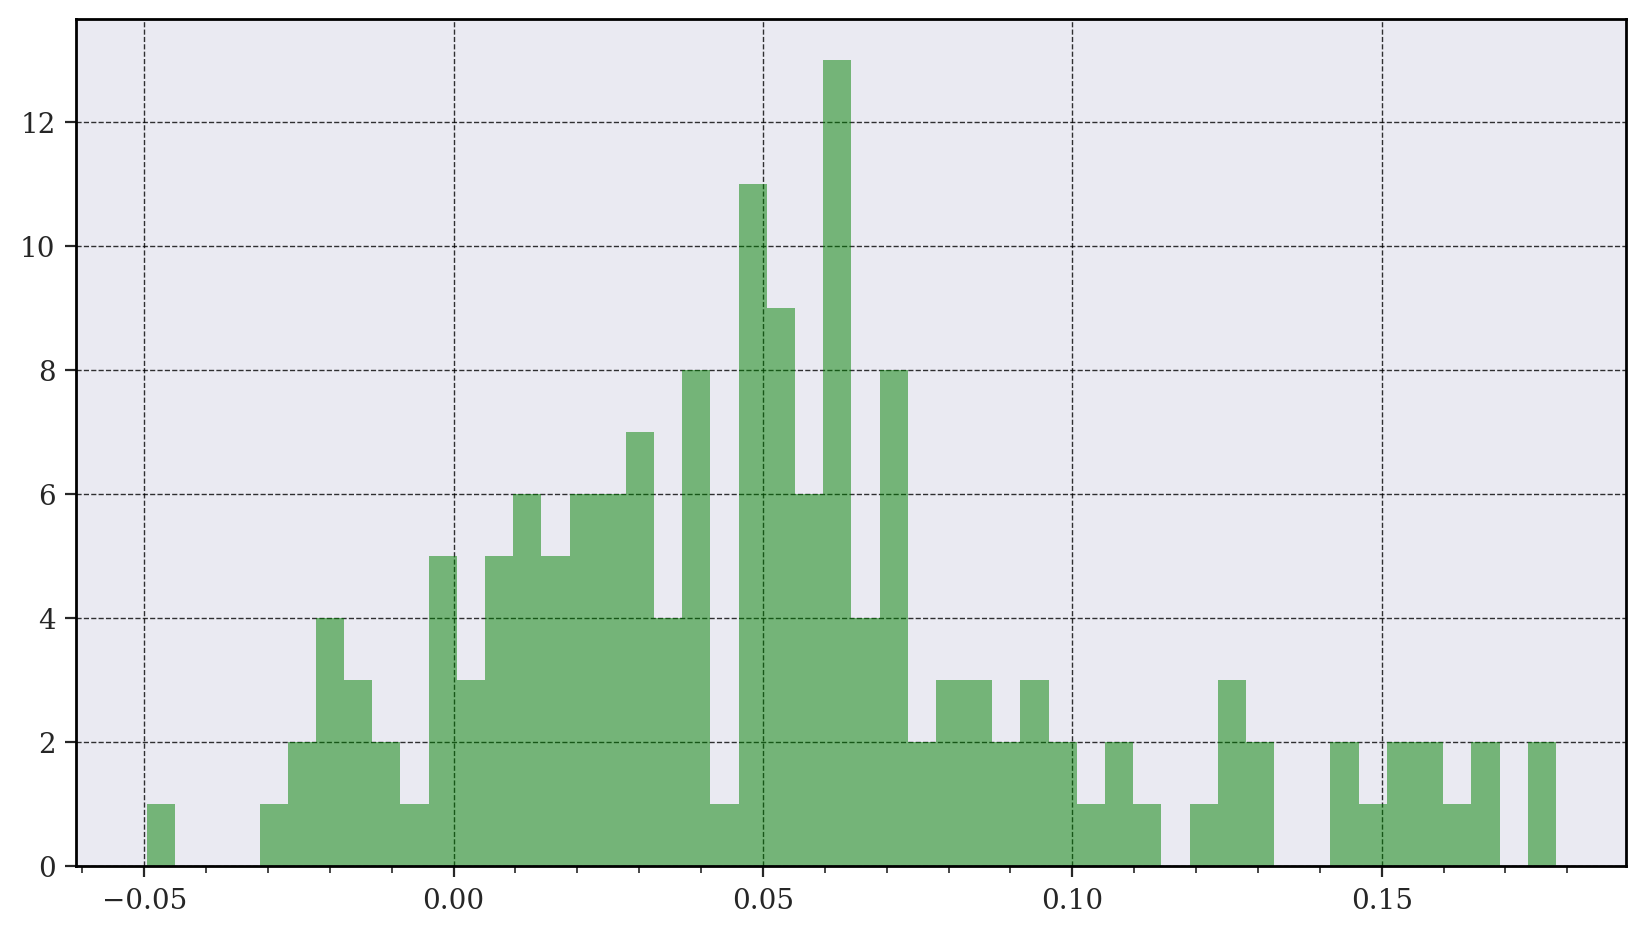

In [156]:
h2 = pair1.data["retYoY_Global_M2 (top50)"].hist(bins=50, alpha=0.5, color=c2)

### Linear regression with trendline shown and $R^2$ value printed.

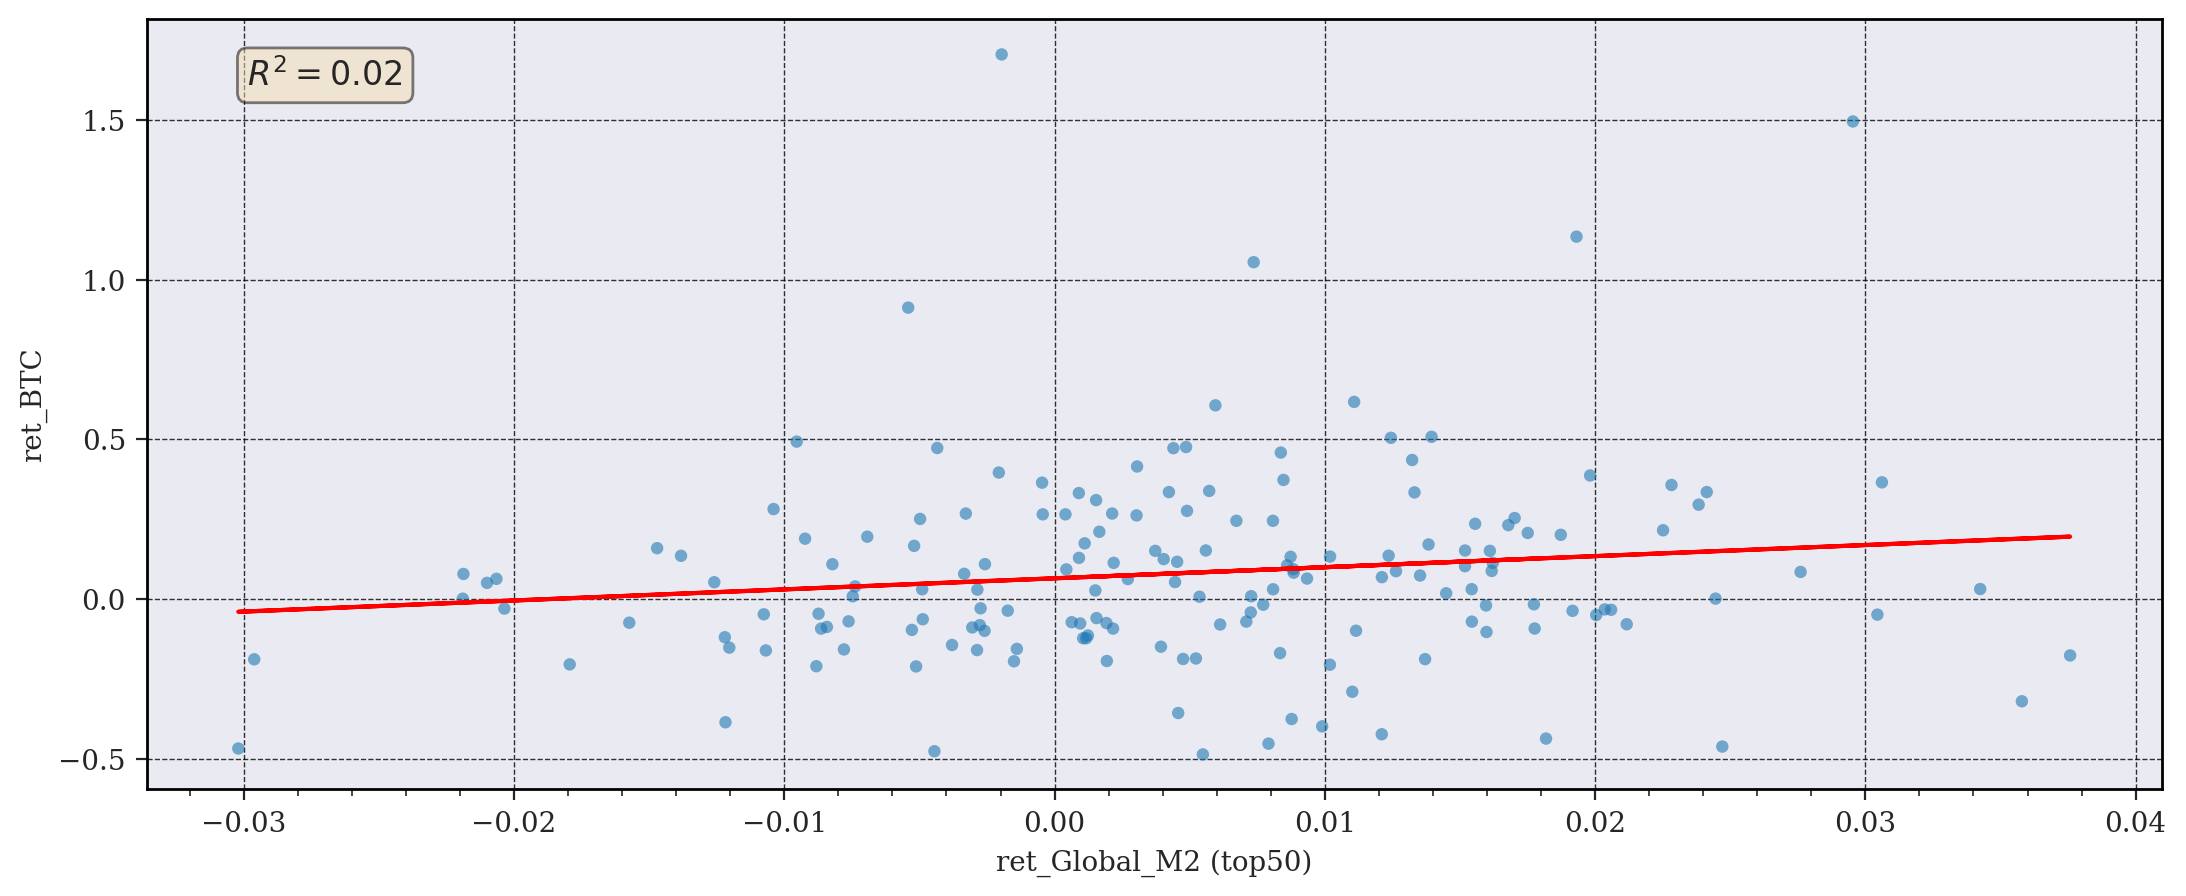

In [52]:
pair1.plot_lin_reg()

## Plot the rolling Pearson Corrlelation traces.
- You have the option to plot 1 - 4 subplots, using different means to calculate the correlation. 
- plot_wrong_way: bool = True - plot the correlation traces calculated using the actual series values (this is wrong).
- percentage_ret_corr: bool = False, plot the rolling PCC calculated using percentage returns rather than log returns.
- qd_corr: bool = False, plot the PCC traces done using a modified PCC formula by QuantDare.

Frequency of the pair:  Monthly


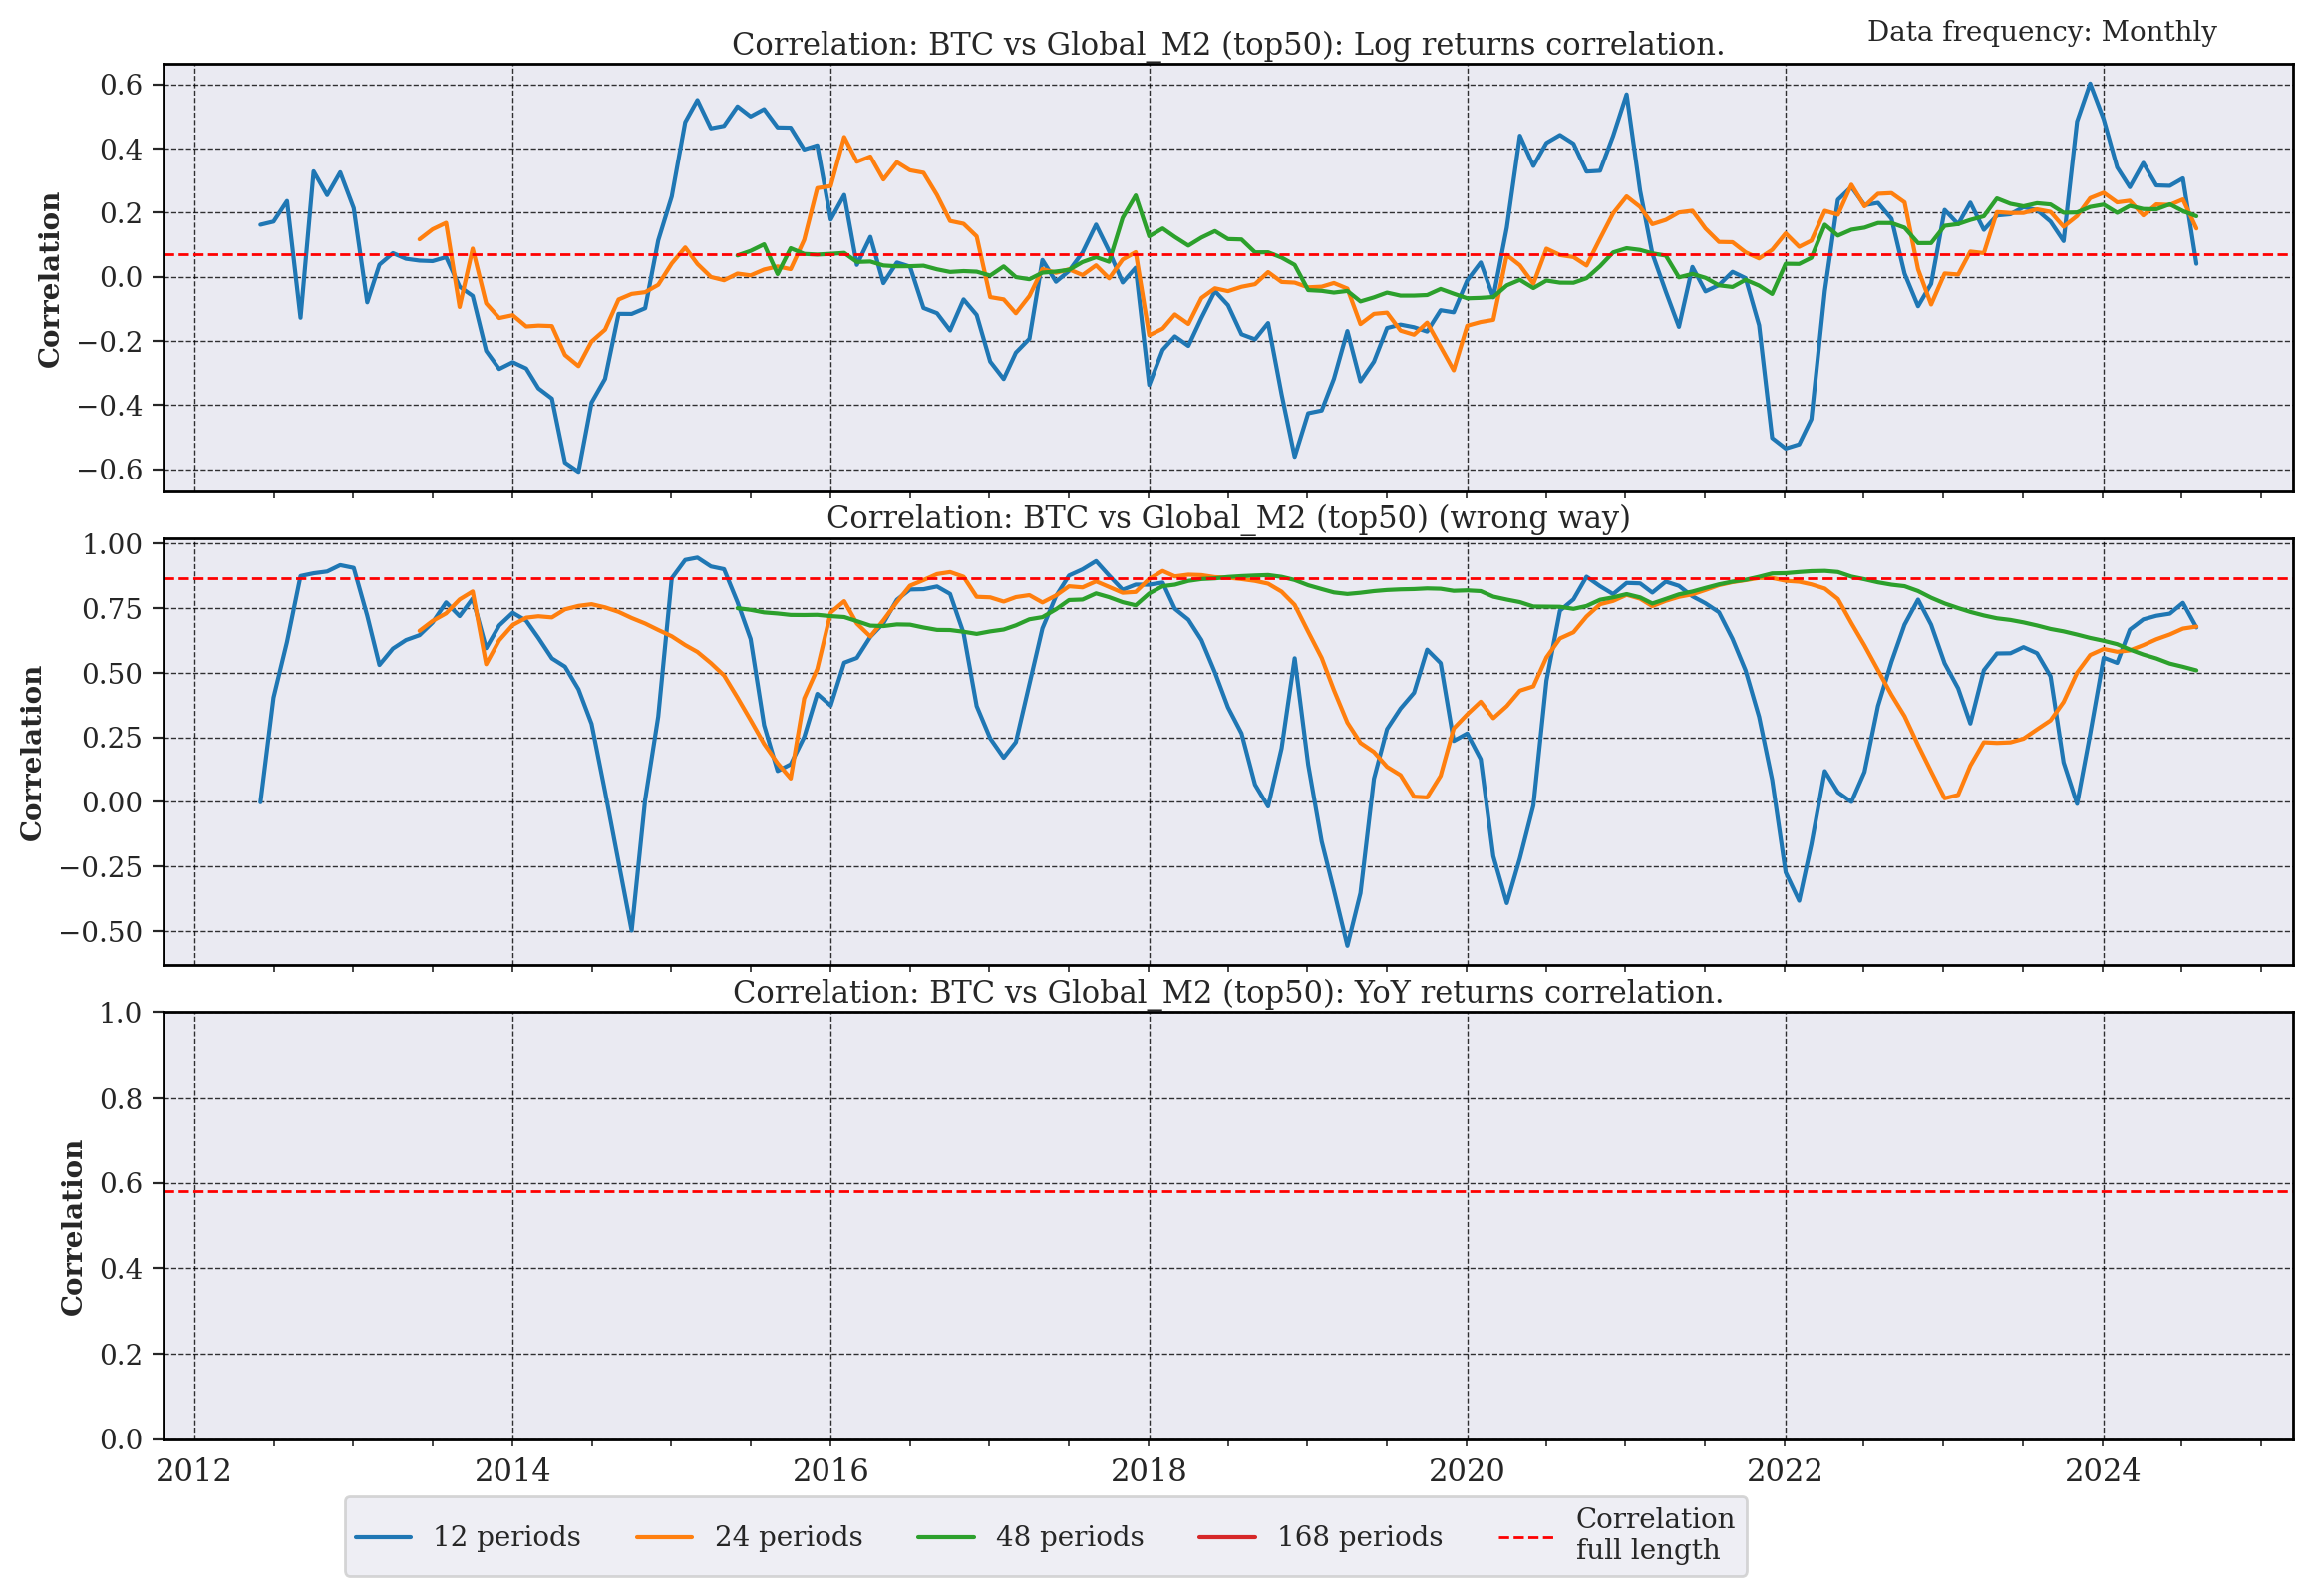

In [150]:
pair1.plot_corrs(YoY_retCorr=True)

## Cross - correlation analysis
Move around one of the data series, shifted +/- n number of periods. Calculate correlation at each shift.

Optimal lag: 4 Highest correlation: 0.18823659817288702


(4, 0.18823659817288702)

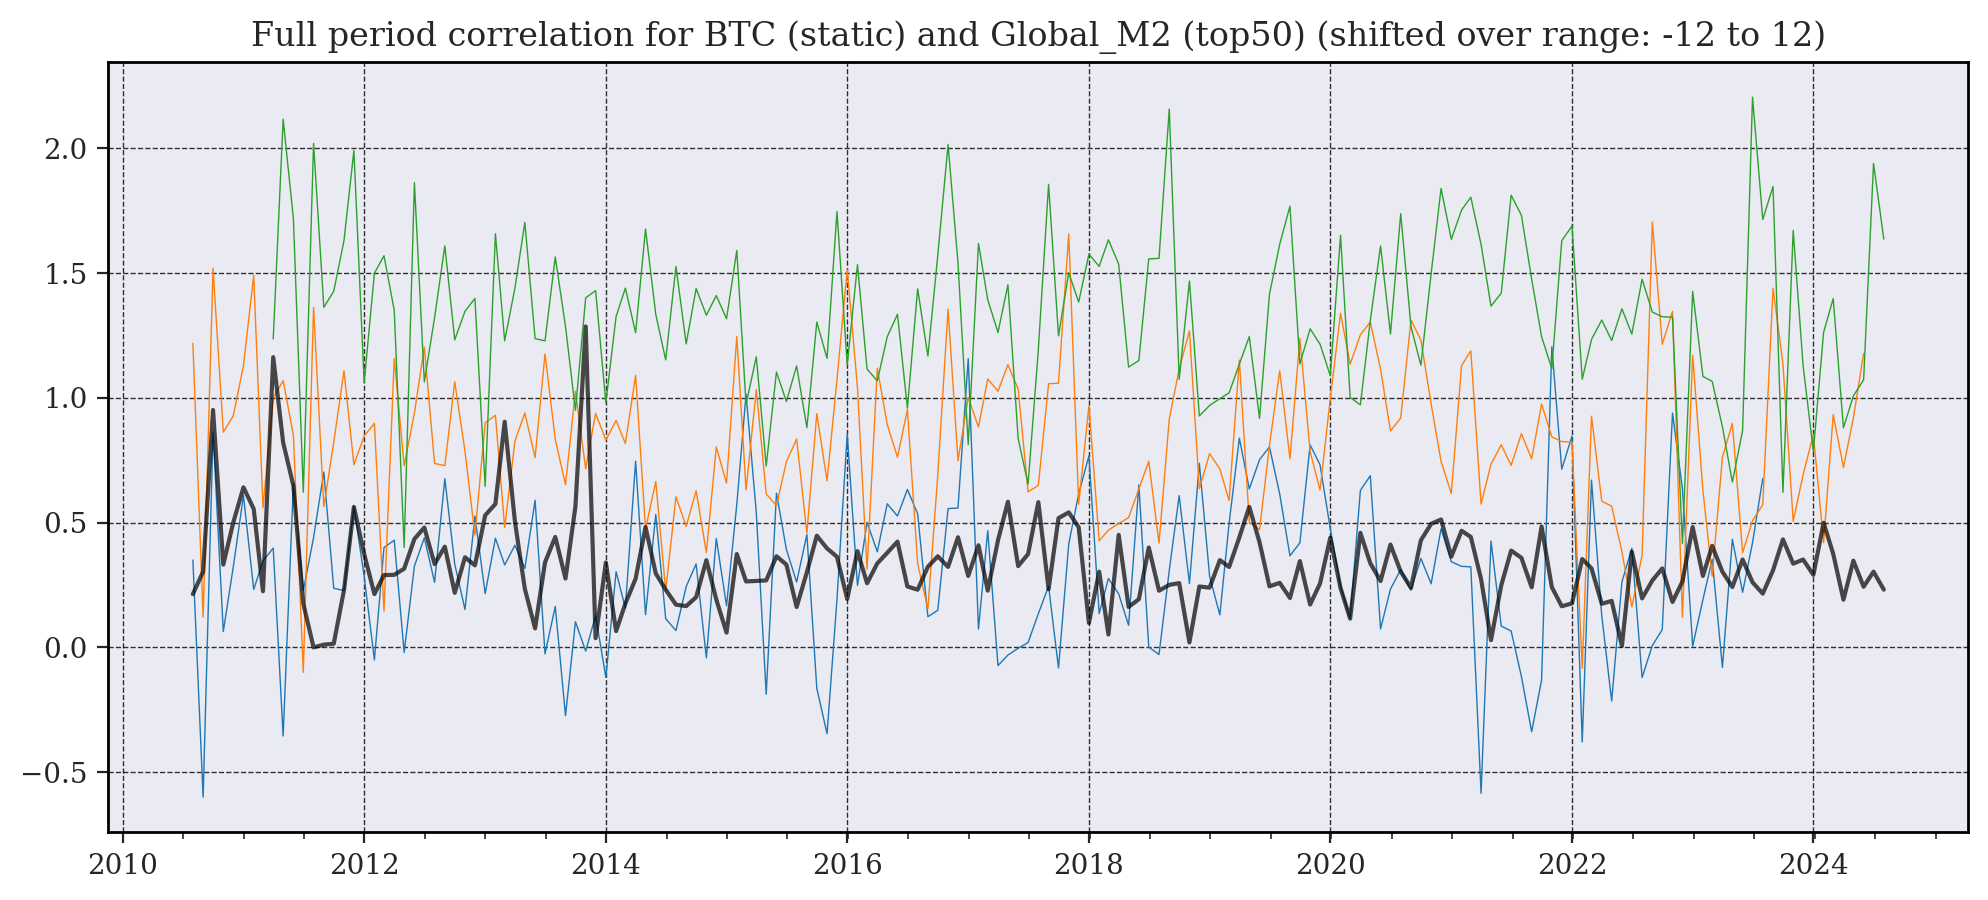

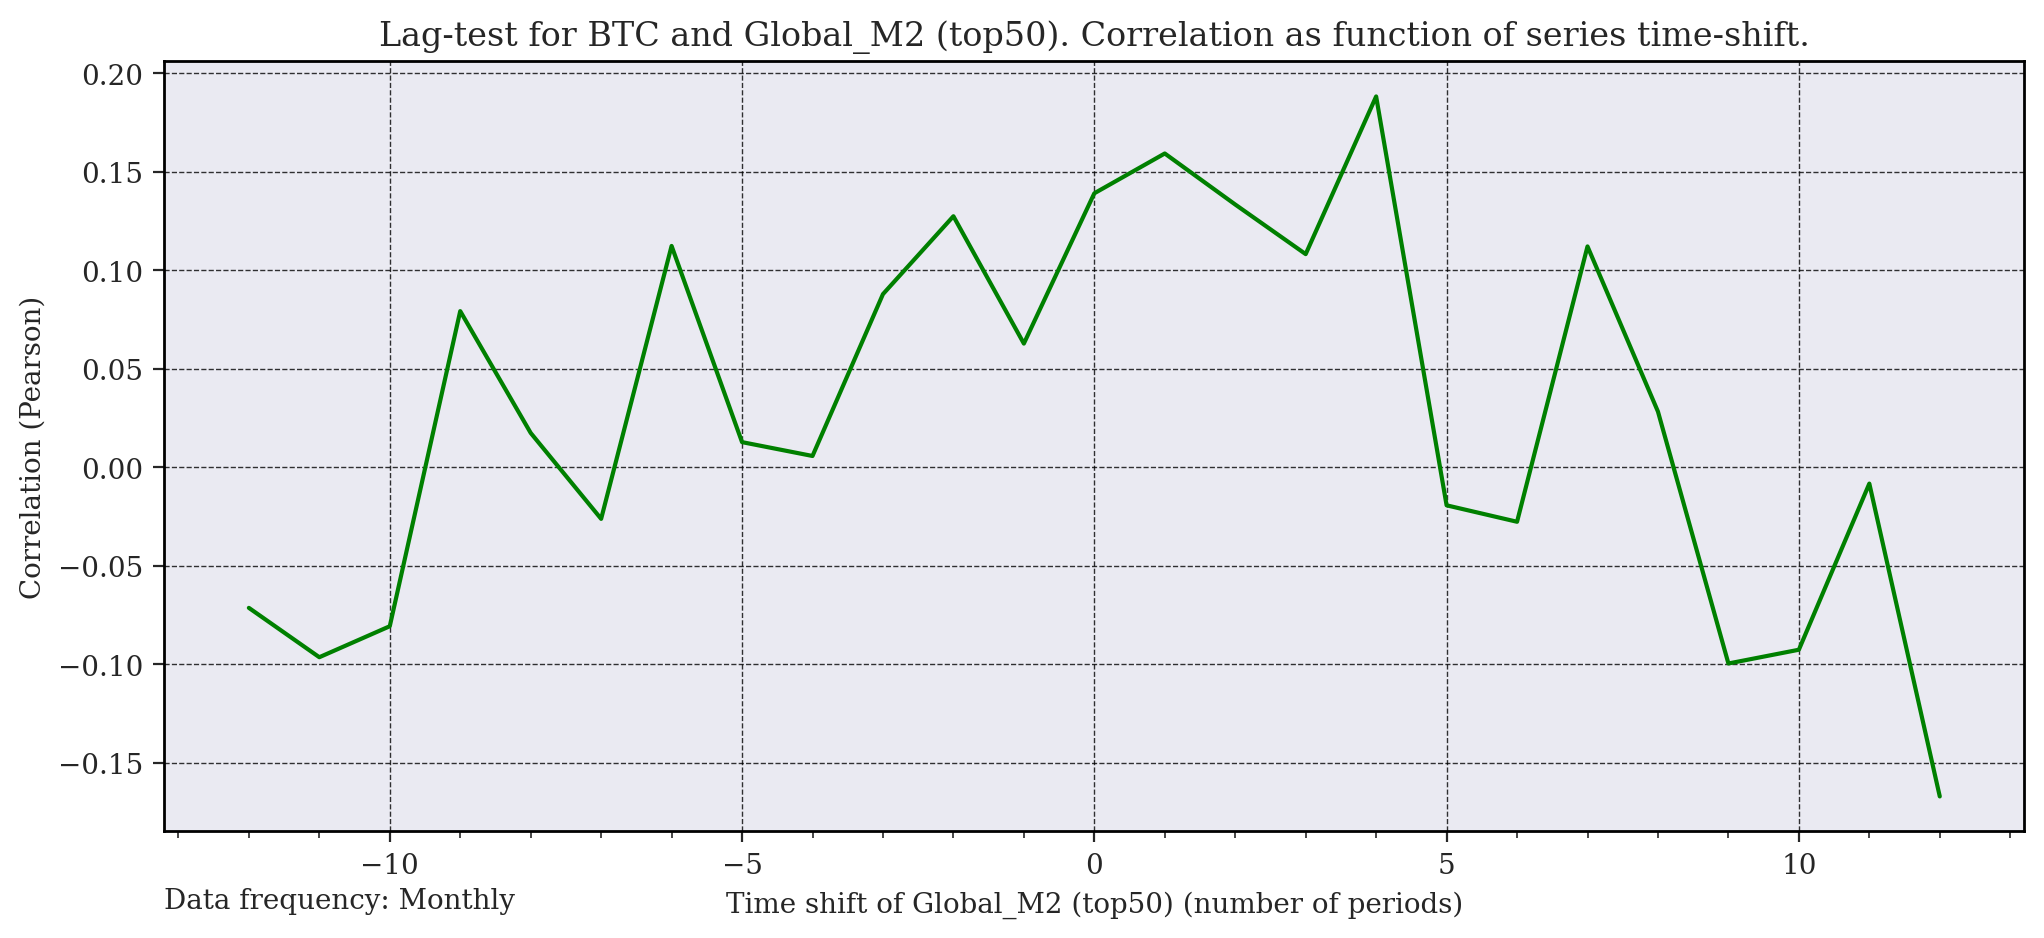

In [54]:
pair1.find_optimal_ret_lag(12)

### Export your plots..

In [55]:
pair1.export_plots(savePath = "/Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets", dialog="Qt", format = "png")

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:1457: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig1.savefig(savePath + fdel + savename + '_series.' + format, **save_options)


Saved figure 1 to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_series.png
Saved returns_plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_ret.png
Saved linear regression scatter plot to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_reg.png
Saved correlation plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_corr.png
Saved scatter matrix plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_scatMat.png
Saved lag plot figure to:  /Users/jamesbishop/Documents/Financial/Investment/MACRO_STUDIES/TwitterThreadz/BTC_Liquidities/assets/BTC-Global_M2_(top50)_lag.png
Saved lag plot

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_43387/2497829411.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


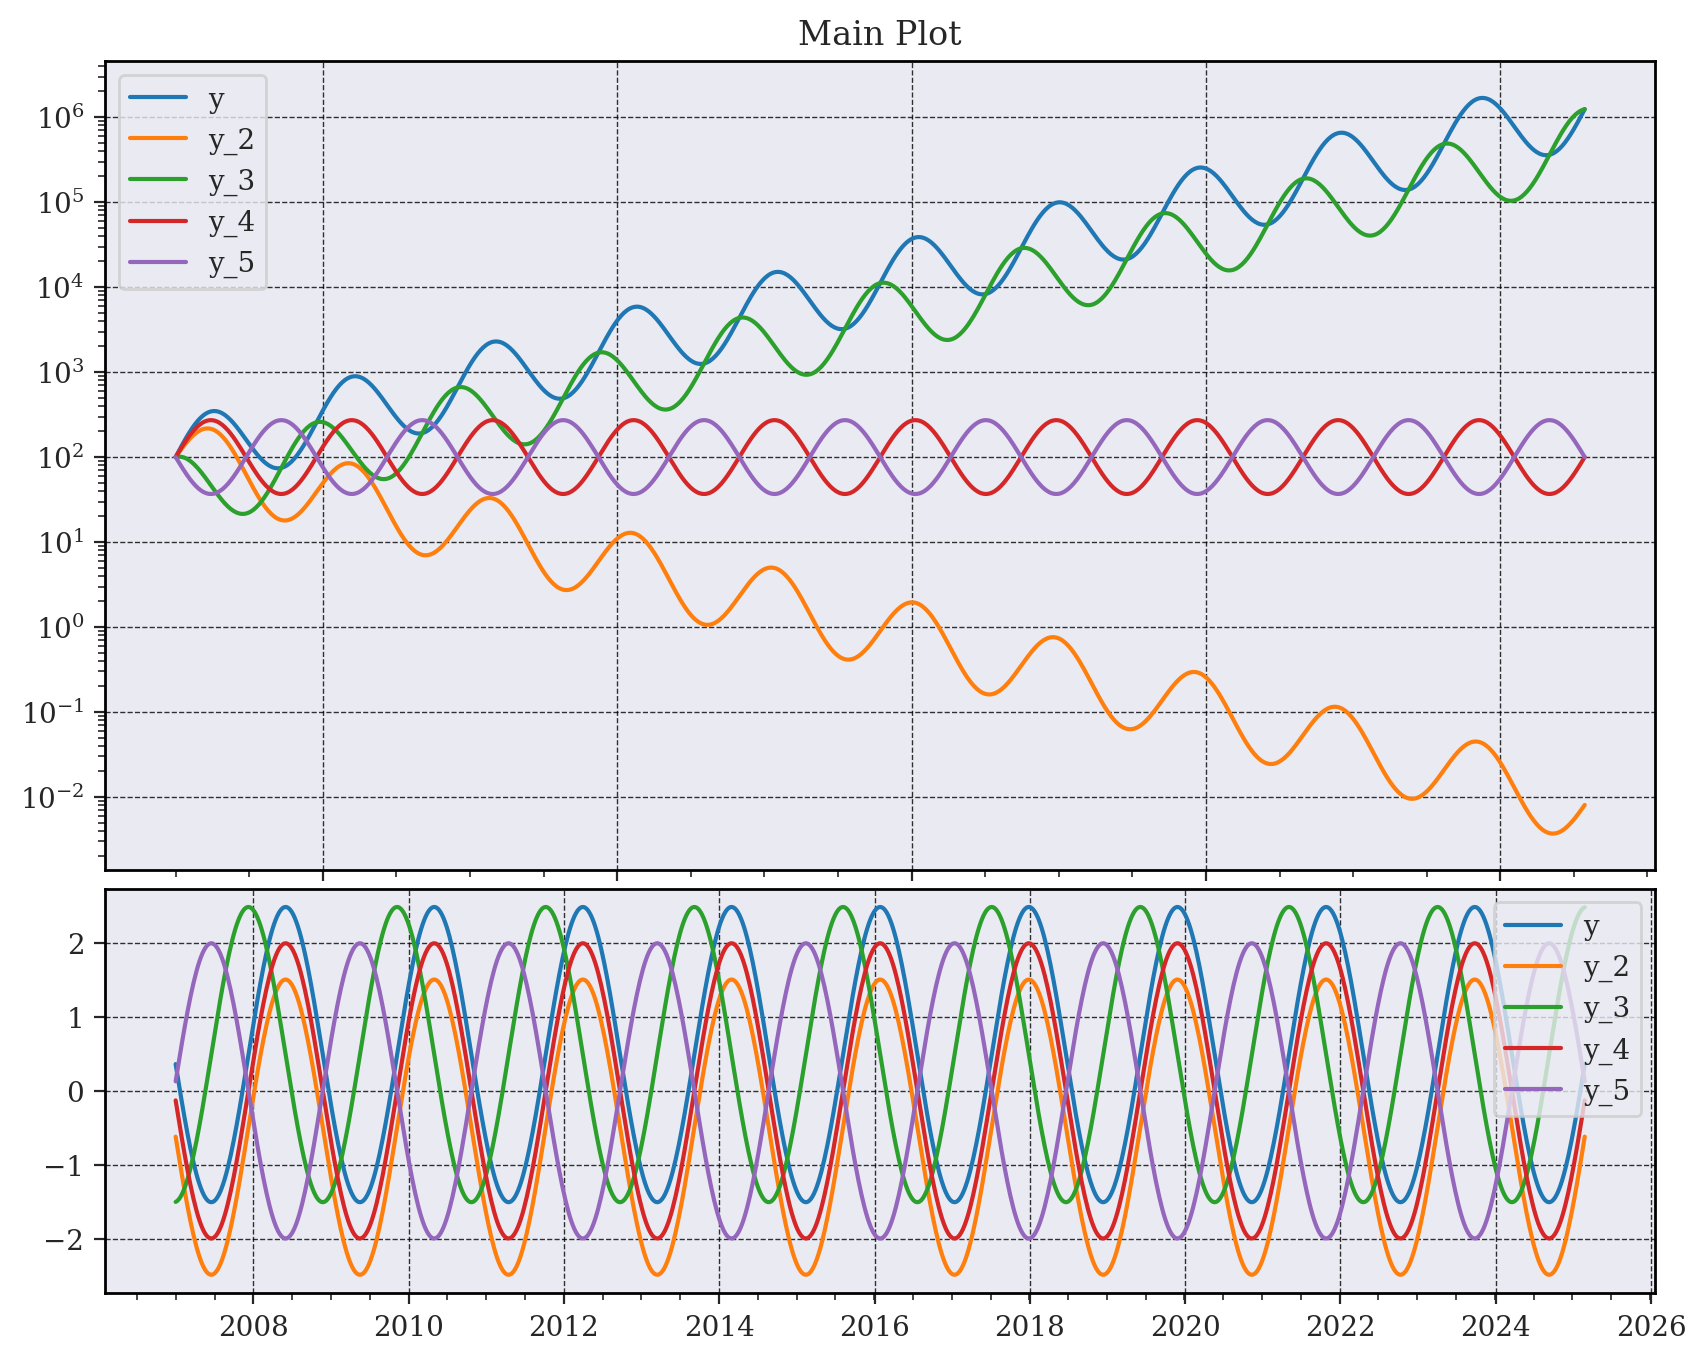

In [130]:
from matplotlib.gridspec import GridSpec

# Generate data
x = np.linspace(-10 * np.pi, 10 * np.pi, 1000)
y = np.exp(np.sin(x) + 0.15 * x) / np.exp(np.sin(x[0]) + 0.15 * x[0]) * 100
y_2 = np.exp(np.sin(x) - 0.15 * x) / np.exp(np.sin(x[0]) - 0.15 * x[0]) * 100
y_3 = np.exp(np.cos(x) + 0.15 * x) / np.exp(np.cos(x[0]) + 0.15 * x[0]) * 100
y_4 = np.exp(np.sin(x)) / np.exp(np.sin(x[0])) * 100
y_5 = np.exp(np.sin(x + np.pi)) / np.exp(np.sin(x[0] + np.pi)) * 100

series_list = {"y": y, "y_2": y_2, "y_3": y_3, "y_4": y_4, "y_5": y_5}
dtIndex = pd.date_range(start = "2006-01-01", periods = 1000, freq = "W")
df = pd.DataFrame(series_list, index = dtIndex)

# Create a figure with GridSpec
figga = plt.figure(figsize=(10, 8))
gs = GridSpec(2, 1, height_ratios=[2, 1], hspace = 0.03)  # 2:1 height ratio

# Top plot
ax1 = figga.add_subplot(gs[0])
ax2 = figga.add_subplot(gs[1])
for col in df.columns:
    series = df[col]
    ax1.plot(series, label=series.name)
    df[col+"logretYoY"] = np.log(series/series.shift(52))
    ax2.plot(df[col+"logretYoY"], label=col)
ax1.set_yscale('log')
ax1.legend()
ax1.set_title('Main Plot')

# Bottom plot
ax2.legend()

plt.tight_layout()
plt.show()

In [133]:
corrs = df.corr().to_markdown()
print(corrs)

|              |           y |        y_2 |        y_3 |        y_4 |        y_5 |   ylogretYoY |   y_2logretYoY |   y_3logretYoY |   y_4logretYoY |   y_5logretYoY |
|:-------------|------------:|-----------:|-----------:|-----------:|-----------:|-------------:|---------------:|---------------:|---------------:|---------------:|
| y            |  1          | -0.188784  |  0.578563  |  0.223616  | -0.204786  |  0.249434    |    0.249434    |    0.00813934  |    0.249434    |   -0.249434    |
| y_2          | -0.188784   |  1         | -0.159849  |  0.312157  | -0.277813  |  0.25077     |    0.25077     |    0.0330217   |    0.25077     |   -0.25077     |
| y_3          |  0.578563   | -0.159849  |  1         | -0.103956  |  0.0700652 | -0.0928894   |   -0.0928894   |    0.26553     |   -0.0928894   |    0.0928894   |
| y_4          |  0.223616   |  0.312157  | -0.103956  |  1         | -0.890827  |  0.969738    |    0.969738    |    0.0616245   |    0.969738    |   -0.969738    |
| y_

|              |           y |        y_2 |        y_3 |        y_4 |        y_5 |   ylogretYoY |   y_2logretYoY |   y_3logretYoY |   y_4logretYoY |   y_5logretYoY |
|:-------------|------------:|-----------:|-----------:|-----------:|-----------:|-------------:|---------------:|---------------:|---------------:|---------------:|
| y            |  1          | -0.188784  |  0.578563  |  0.223616  | -0.204786  |  0.249434    |    0.249434    |    0.00813934  |    0.249434    |   -0.249434    |
| y_2          | -0.188784   |  1         | -0.159849  |  0.312157  | -0.277813  |  0.25077     |    0.25077     |    0.0330217   |    0.25077     |   -0.25077     |
| y_3          |  0.578563   | -0.159849  |  1         | -0.103956  |  0.0700652 | -0.0928894   |   -0.0928894   |    0.26553     |   -0.0928894   |    0.0928894   |
| y_4          |  0.223616   |  0.312157  | -0.103956  |  1         | -0.890827  |  0.969738    |    0.969738    |    0.0616245   |    0.969738    |   -0.969738    |
| y_5          | -0.204786   | -0.277813  |  0.0700652 | -0.890827  |  1         | -0.9695      |   -0.9695      |   -0.0635857   |   -0.9695      |    0.9695      |
| ylogretYoY   |  0.249434   |  0.25077   | -0.0928894 |  0.969738  | -0.9695    |  1           |    1           |   -9.35238e-18 |    1           |   -1           |
| y_2logretYoY |  0.249434   |  0.25077   | -0.0928894 |  0.969738  | -0.9695    |  1           |    1           |   -1.75569e-17 |    1           |   -1           |
| y_3logretYoY |  0.00813934 |  0.0330217 |  0.26553   |  0.0616245 | -0.0635857 | -9.35238e-18 |   -1.75569e-17 |    1           |   -2.78438e-17 |    1.38858e-16 |
| y_4logretYoY |  0.249434   |  0.25077   | -0.0928894 |  0.969738  | -0.9695    |  1           |    1           |   -2.78438e-17 |    1           |   -1           |
| y_5logretYoY | -0.249434   | -0.25077   |  0.0928894 | -0.969738  |  0.9695    | -1           |   -1           |    1.38858e-16 |   -1           |    1           |

In [136]:
print(df.corr()["ylogretYoY"].to_markdown())

|              |   ylogretYoY |
|:-------------|-------------:|
| y            |  0.249434    |
| y_2          |  0.25077     |
| y_3          | -0.0928894   |
| y_4          |  0.969738    |
| y_5          | -0.9695      |
| ylogretYoY   |  1           |
| y_2logretYoY |  1           |
| y_3logretYoY | -9.35238e-18 |
| y_4logretYoY |  1           |
| y_5logretYoY | -1           |


|              |   ylogretYoY |
|:-------------|-------------:|
| y            |  0.249434    |
| y_2          |  0.25077     |
| y_3          | -0.0928894   |
| y_4          |  0.969738    |
| y_5          | -0.9695      |
| ylogretYoY   |  1           |
| y_2logretYoY |  1           |
| y_3logretYoY | -9.35238e-18 |
| y_4logretYoY |  1           |
| y_5logretYoY | -1           |